<a href="https://colab.research.google.com/github/ralin08/Tobacco-Risk-Detection/blob/main/Copy_of_Tobacco_Risk_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **➕ Import Libraries and Files ➕**


---




In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Linking drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Creating datapath
datapath = "/content/drive/MyDrive/ai project/nyts2022.csv"

In [ ]:
# Defining dataset
dataset = pd.read_csv(datapath)
pd.set_option('display.max_columns', None)

<ipython-input-4-a4f0baec2722>:2: DtypeWarning: Columns (242,244,255,342,348,363,397,399,409,422,447,456,469,488,497,510,531,540,553,567,576,589,601,610,623,635,644,657,669,678,691,703,712,725,738,747,760,773,782,795) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(datapath)


### **➕ Visualizing Data ➕**

---



In [ ]:
# Viewing the head of the dataset
dataset.head(10)

,newid,Location,QN1,QN2,QN4A,QN4B,QN4C,QN4D,QN4E,QN5A,QN5B,QN5C,QN5D,QN5E,QN6,QN7,QN8,QN9,QN10,QN11A,QN11B,QN11C,QN11D,QN11E,QN11F,QN11,QN12,QN13,QN14,QN15,QN11.1,QN12.1,QN13.1,QN14.1,QN15.1,QN11A.1,QN11B.1,QN11C.1,QN11D.1,QN11E.1,QN11F.1,QN16,QN17,QN18,QN19,QN20,QN16.1,QN17.1,QN18.1,QN19.1,QN20.1,QN11A.2,QN11B.2,QN11C.2,QN11D.2,QN11E.2,QN11F.2,QN21,QN22,QN23,QN24,QN25,QN21.1,QN22.1,QN23.1,QN24.1,QN25.1,QN11A.3,QN11B.3,QN11C.3,QN11D.3,QN11E.3,QN11F.3,QN26,QN27,QN28,QN29,QN30,QN26.1,QN27.1,QN28.1,QN29.1,QN30.1,QN11A.4,QN11B.4,QN11C.4,QN11D.4,QN11E.4,QN11F.4,QN31,QN32,QN33,QN34,QN35,QN31.1,QN32.1,QN33.1,QN34.1,QN35.1,QN11A.5,QN11B.5,QN11C.5,QN11D.5,QN11E.5,QN11F.5,QN36,QN37,QN38,QN39,QN40,QN36.1,QN37.1,QN38.1,QN39.1,QN40.1,QN11A.6,QN11B.6,QN11C.6,QN11D.6,QN11E.6,QN11F.6,QN41,QN42,QN43,QN44,QN45,QN41.1,QN42.1,QN43.1,QN44.1,QN45.1,QN11A.7,QN11B.7,QN11C.7,QN11D.7,QN11E.7,QN11F.7,QN97,QN98,QN99,QN100,QN101,QN102,QN103,QN104A,QN104B,QN104C,QN104D,QN104E,QN109,QN110A,QN110B,QN110C,QN110D,QN110E,QN110F,QN111,QN112,QN113,QN114,QN115,QN116,QN117,QN118,QN119,QN120,QN121,QN122,QN123,QN124,QN125,QN126,QN127,QN128,QN129,QN130,QN131,QN132,QN133,QN134,QN135A,QN135B,QN135C,QN135D,QN135E,QN135F,QN135G,QN135H,QN136,QN137,QN138A,QN138B,QN138C,QN138D,QN138E,QN138F,QN138G,QN139,QN140,QN141,QN142,QN143,QN144,QN145,QN146,QN147,QN148,QN149,QN150,QN151,QN152A,QN152B,QN152C,QN152D,QN152E,QN152F,QN153A,QN153B,QN153C,QN153D,QN153E,QN153F,QN153G,QN153H,QN153I,QN153J,QN153K,QN153L,QN153M,QN154,QN155,QN156,QN157A,QN157B,QN157C,QN157D,QN161,QN162,QN163,QN164,QN165,QN166,Q1,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,Q5C,Q5D,Q5E,Q6,Q7,Q8,Q9,Q10,Q11A,Q11B,Q11C,Q11D,Q11E,Q11F,Q11G,Q11H,Q11I,Q11J,Q11K,Q11L,Q11M,Q11N,Q11_OTHER,Q12A,Q12B,Q12C,Q12D,Q12E,Q12F,Q12G,Q12H,Q12I,Q12J,Q12K,Q12L,Q12M,Q12N,Q12_OTHER,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q14H,Q14I,Q14J,Q14K,Q14L,Q14M,Q14N,Q14O,Q14_OTHER,Q15,Q15_OTHER,Q16,Q17,Q18A,Q19AA,Q19AB,Q19AC,Q19AD,Q19AE,Q19AF,Q19AG,Q19AH,Q19A_OTHER,Q20AA,Q20AB,Q20AC,Q20AD,Q20AE,Q20AF,Q20AG,Q20AH,Q20A_OTHER,Q21AA,Q21AB,Q21AC,Q21AD,Q21AE,Q21AF,Q21AG,Q21AH,Q21AI,Q21AJ,Q21AK,Q21AL,Q21A_OTHER,Q22,Q23A,Q23B,Q23C,Q23D,Q23_OTHER,Q24,Q25,Q26,Q27,Q28A,Q28B,Q28C,Q28D,Q28E,Q28F,Q28G,Q28H,Q28I,Q28J,Q28_OTHER,Q29,Q30,Q31,Q32,Q33A,Q33B,Q33C,Q33D,Q33D_OTHER,Q34A,Q34B,Q34C,Q34D,Q34D_OTHER,Q35,Q36,Q37,Q38,Q39,Q40,Q41A,Q41B,Q41C,Q41D,Q41E,Q41F,Q41G,Q41H,Q41I,Q41J,Q41K,Q41L,Q41M,Q41_OTHER,Q42,Q42_OTHER,Q43,Q20BA,Q20BB,Q20BC,Q20BD,Q20BE,Q20BF,Q20BG,Q20BH,Q20B_OTHER,Q21BA,Q21BB,Q21BC,Q21BD,Q21BE,Q21BF,Q21BG,Q21BH,Q21BI,Q21BJ,Q21BK,Q21BL,Q21B_OTHER,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55A,Q55B,Q55C,Q55D,Q18B,Q19BA,Q19BB,Q19BC,Q19BD,Q19BE,Q19BF,Q19BG,Q19BH,Q19B_OTHER,Q20CA,Q20CB,Q20CC,Q20CD,Q20CE,Q20CF,Q20CG,Q20CH,Q20C_OTHER,Q21CA,Q21CB,Q21CC,Q21CD,Q21CE,Q21CF,Q21CG,Q21CH,Q21CI,Q21CJ,Q21CK,Q21CL,Q21C_OTHER,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q18C,Q19CA,Q19CB,Q19CC,Q19CD,Q19CE,Q19CF,Q19CG,Q19CH,Q19C_OTHER,Q20DA,Q20DB,Q20DC,Q20DD,Q20DE,Q20DF,Q20DG,Q20DH,Q20D_OTHER,Q21DA,Q21DB,Q21DC,Q21DD,Q21DE,Q21DF,Q21DG,Q21DH,Q21DI,Q21DJ,Q21DK,Q21DL,Q21D_OTHER,Q65,Q66,Q67,Q68,Q69,Q70A,Q70B,Q70C,Q70D,Q70E,Q70F,Q18D,Q19DA,Q19DB,Q19DC,Q19DD,Q19DE,Q19DF,Q19DG,Q19DH,Q19D_OTHER,Q20EA,Q20EB,Q20EC,Q20ED,Q20EE,Q20EF,Q20EG,Q20EH,Q20E_OTHER,Q21EA,Q21EB,Q21EC,Q21ED,Q21EE,Q21EF,Q21EG,Q21EH,Q21EI,Q21EJ,Q21EK,Q21EL,Q21E_OTHER,Q71,Q72,Q73,Q74,Q18I,Q19IA,Q19IB,Q19IC,Q19ID,Q19IE,Q19IF,Q19IG,Q19IH,Q19I_OTHER,Q20JA,Q20JB,Q20JC,Q20JD,Q20JE,Q20JF,Q20JG,Q20JH,Q20J_OTHER,Q21JA,Q21JB,Q21JC,Q21JD,Q21JE,Q21JF,Q21JG,Q21JH,Q21JI,Q21JJ,Q21JK,Q21JL,Q21J_OTHER,Q75,Q76,Q18E,Q19EA,Q19EB,Q19EC,Q19ED,Q19EE,Q19EF,Q19EG,Q19EH,Q19E_OTHER,Q20FA,Q20FB,Q20FC,Q20FD,Q20FE,Q20FF,Q20FG,Q20FH,Q20F_OTHER,Q21FA,Q21FB,Q21FC,Q21FD,Q21FE,Q21FF,Q21FG,Q21FH,Q21FI,Q21FJ,Q21FK,Q21FL,Q21F_OTHER,Q77,Q78,Q18F,Q19FA,Q19FB,Q19FC,Q19FD,Q19FE,Q19FF,Q19FG,Q19FH,Q19F_OTHER,Q20GA,Q20GB,Q20GC,Q20GD,Q20GE,Q20GF,Q20GG,Q20GH,Q20G_OTHER,Q21GA,Q21GB,Q21GC,Q21GD,Q21GE,Q21GF,Q21GG,Q21GH,Q21GI,Q21GJ,Q21GK,Q21GL,Q21G_OTHER,Q79,Q80,Q18G,Q19GA,Q19GB,Q19GC

In [ ]:
# Viewing the tail of the dataset
dataset.tail()

,newid,Location,QN1,QN2,QN4A,QN4B,QN4C,QN4D,QN4E,QN5A,QN5B,QN5C,QN5D,QN5E,QN6,QN7,QN8,QN9,QN10,QN11A,QN11B,QN11C,QN11D,QN11E,QN11F,QN11,QN12,QN13,QN14,QN15,QN11.1,QN12.1,QN13.1,QN14.1,QN15.1,QN11A.1,QN11B.1,QN11C.1,QN11D.1,QN11E.1,QN11F.1,QN16,QN17,QN18,QN19,QN20,QN16.1,QN17.1,QN18.1,QN19.1,QN20.1,QN11A.2,QN11B.2,QN11C.2,QN11D.2,QN11E.2,QN11F.2,QN21,QN22,QN23,QN24,QN25,QN21.1,QN22.1,QN23.1,QN24.1,QN25.1,QN11A.3,QN11B.3,QN11C.3,QN11D.3,QN11E.3,QN11F.3,QN26,QN27,QN28,QN29,QN30,QN26.1,QN27.1,QN28.1,QN29.1,QN30.1,QN11A.4,QN11B.4,QN11C.4,QN11D.4,QN11E.4,QN11F.4,QN31,QN32,QN33,QN34,QN35,QN31.1,QN32.1,QN33.1,QN34.1,QN35.1,QN11A.5,QN11B.5,QN11C.5,QN11D.5,QN11E.5,QN11F.5,QN36,QN37,QN38,QN39,QN40,QN36.1,QN37.1,QN38.1,QN39.1,QN40.1,QN11A.6,QN11B.6,QN11C.6,QN11D.6,QN11E.6,QN11F.6,QN41,QN42,QN43,QN44,QN45,QN41.1,QN42.1,QN43.1,QN44.1,QN45.1,QN11A.7,QN11B.7,QN11C.7,QN11D.7,QN11E.7,QN11F.7,QN97,QN98,QN99,QN100,QN101,QN102,QN103,QN104A,QN104B,QN104C,QN104D,QN104E,QN109,QN110A,QN110B,QN110C,QN110D,QN110E,QN110F,QN111,QN112,QN113,QN114,QN115,QN116,QN117,QN118,QN119,QN120,QN121,QN122,QN123,QN124,QN125,QN126,QN127,QN128,QN129,QN130,QN131,QN132,QN133,QN134,QN135A,QN135B,QN135C,QN135D,QN135E,QN135F,QN135G,QN135H,QN136,QN137,QN138A,QN138B,QN138C,QN138D,QN138E,QN138F,QN138G,QN139,QN140,QN141,QN142,QN143,QN144,QN145,QN146,QN147,QN148,QN149,QN150,QN151,QN152A,QN152B,QN152C,QN152D,QN152E,QN152F,QN153A,QN153B,QN153C,QN153D,QN153E,QN153F,QN153G,QN153H,QN153I,QN153J,QN153K,QN153L,QN153M,QN154,QN155,QN156,QN157A,QN157B,QN157C,QN157D,QN161,QN162,QN163,QN164,QN165,QN166,Q1,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,Q5C,Q5D,Q5E,Q6,Q7,Q8,Q9,Q10,Q11A,Q11B,Q11C,Q11D,Q11E,Q11F,Q11G,Q11H,Q11I,Q11J,Q11K,Q11L,Q11M,Q11N,Q11_OTHER,Q12A,Q12B,Q12C,Q12D,Q12E,Q12F,Q12G,Q12H,Q12I,Q12J,Q12K,Q12L,Q12M,Q12N,Q12_OTHER,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q14H,Q14I,Q14J,Q14K,Q14L,Q14M,Q14N,Q14O,Q14_OTHER,Q15,Q15_OTHER,Q16,Q17,Q18A,Q19AA,Q19AB,Q19AC,Q19AD,Q19AE,Q19AF,Q19AG,Q19AH,Q19A_OTHER,Q20AA,Q20AB,Q20AC,Q20AD,Q20AE,Q20AF,Q20AG,Q20AH,Q20A_OTHER,Q21AA,Q21AB,Q21AC,Q21AD,Q21AE,Q21AF,Q21AG,Q21AH,Q21AI,Q21AJ,Q21AK,Q21AL,Q21A_OTHER,Q22,Q23A,Q23B,Q23C,Q23D,Q23_OTHER,Q24,Q25,Q26,Q27,Q28A,Q28B,Q28C,Q28D,Q28E,Q28F,Q28G,Q28H,Q28I,Q28J,Q28_OTHER,Q29,Q30,Q31,Q32,Q33A,Q33B,Q33C,Q33D,Q33D_OTHER,Q34A,Q34B,Q34C,Q34D,Q34D_OTHER,Q35,Q36,Q37,Q38,Q39,Q40,Q41A,Q41B,Q41C,Q41D,Q41E,Q41F,Q41G,Q41H,Q41I,Q41J,Q41K,Q41L,Q41M,Q41_OTHER,Q42,Q42_OTHER,Q43,Q20BA,Q20BB,Q20BC,Q20BD,Q20BE,Q20BF,Q20BG,Q20BH,Q20B_OTHER,Q21BA,Q21BB,Q21BC,Q21BD,Q21BE,Q21BF,Q21BG,Q21BH,Q21BI,Q21BJ,Q21BK,Q21BL,Q21B_OTHER,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55A,Q55B,Q55C,Q55D,Q18B,Q19BA,Q19BB,Q19BC,Q19BD,Q19BE,Q19BF,Q19BG,Q19BH,Q19B_OTHER,Q20CA,Q20CB,Q20CC,Q20CD,Q20CE,Q20CF,Q20CG,Q20CH,Q20C_OTHER,Q21CA,Q21CB,Q21CC,Q21CD,Q21CE,Q21CF,Q21CG,Q21CH,Q21CI,Q21CJ,Q21CK,Q21CL,Q21C_OTHER,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q18C,Q19CA,Q19CB,Q19CC,Q19CD,Q19CE,Q19CF,Q19CG,Q19CH,Q19C_OTHER,Q20DA,Q20DB,Q20DC,Q20DD,Q20DE,Q20DF,Q20DG,Q20DH,Q20D_OTHER,Q21DA,Q21DB,Q21DC,Q21DD,Q21DE,Q21DF,Q21DG,Q21DH,Q21DI,Q21DJ,Q21DK,Q21DL,Q21D_OTHER,Q65,Q66,Q67,Q68,Q69,Q70A,Q70B,Q70C,Q70D,Q70E,Q70F,Q18D,Q19DA,Q19DB,Q19DC,Q19DD,Q19DE,Q19DF,Q19DG,Q19DH,Q19D_OTHER,Q20EA,Q20EB,Q20EC,Q20ED,Q20EE,Q20EF,Q20EG,Q20EH,Q20E_OTHER,Q21EA,Q21EB,Q21EC,Q21ED,Q21EE,Q21EF,Q21EG,Q21EH,Q21EI,Q21EJ,Q21EK,Q21EL,Q21E_OTHER,Q71,Q72,Q73,Q74,Q18I,Q19IA,Q19IB,Q19IC,Q19ID,Q19IE,Q19IF,Q19IG,Q19IH,Q19I_OTHER,Q20JA,Q20JB,Q20JC,Q20JD,Q20JE,Q20JF,Q20JG,Q20JH,Q20J_OTHER,Q21JA,Q21JB,Q21JC,Q21JD,Q21JE,Q21JF,Q21JG,Q21JH,Q21JI,Q21JJ,Q21JK,Q21JL,Q21J_OTHER,Q75,Q76,Q18E,Q19EA,Q19EB,Q19EC,Q19ED,Q19EE,Q19EF,Q19EG,Q19EH,Q19E_OTHER,Q20FA,Q20FB,Q20FC,Q20FD,Q20FE,Q20FF,Q20FG,Q20FH,Q20F_OTHER,Q21FA,Q21FB,Q21FC,Q21FD,Q21FE,Q21FF,Q21FG,Q21FH,Q21FI,Q21FJ,Q21FK,Q21FL,Q21F_OTHER,Q77,Q78,Q18F,Q19FA,Q19FB,Q19FC,Q19FD,Q19FE,Q19FF,Q19FG,Q19FH,Q19F_OTHER,Q20GA,Q20GB,Q20GC,Q20GD,Q20GE,Q20GF,Q20GG,Q20GH,Q20G_OTHER,Q21GA,Q21GB,Q21GC,Q21GD,Q21GE,Q21GF,Q21GG,Q21GH,Q21GI,Q21GJ,Q21GK,Q21GL,Q21G_OTHER,Q79,Q80,Q18G,Q19GA,Q19GB,Q19GC

In [ ]:
# Viewing the middle of the dataset
dataset.loc[100:111]

,newid,Location,QN1,QN2,QN4A,QN4B,QN4C,QN4D,QN4E,QN5A,QN5B,QN5C,QN5D,QN5E,QN6,QN7,QN8,QN9,QN10,QN11A,QN11B,QN11C,QN11D,QN11E,QN11F,QN11,QN12,QN13,QN14,QN15,QN11.1,QN12.1,QN13.1,QN14.1,QN15.1,QN11A.1,QN11B.1,QN11C.1,QN11D.1,QN11E.1,QN11F.1,QN16,QN17,QN18,QN19,QN20,QN16.1,QN17.1,QN18.1,QN19.1,QN20.1,QN11A.2,QN11B.2,QN11C.2,QN11D.2,QN11E.2,QN11F.2,QN21,QN22,QN23,QN24,QN25,QN21.1,QN22.1,QN23.1,QN24.1,QN25.1,QN11A.3,QN11B.3,QN11C.3,QN11D.3,QN11E.3,QN11F.3,QN26,QN27,QN28,QN29,QN30,QN26.1,QN27.1,QN28.1,QN29.1,QN30.1,QN11A.4,QN11B.4,QN11C.4,QN11D.4,QN11E.4,QN11F.4,QN31,QN32,QN33,QN34,QN35,QN31.1,QN32.1,QN33.1,QN34.1,QN35.1,QN11A.5,QN11B.5,QN11C.5,QN11D.5,QN11E.5,QN11F.5,QN36,QN37,QN38,QN39,QN40,QN36.1,QN37.1,QN38.1,QN39.1,QN40.1,QN11A.6,QN11B.6,QN11C.6,QN11D.6,QN11E.6,QN11F.6,QN41,QN42,QN43,QN44,QN45,QN41.1,QN42.1,QN43.1,QN44.1,QN45.1,QN11A.7,QN11B.7,QN11C.7,QN11D.7,QN11E.7,QN11F.7,QN97,QN98,QN99,QN100,QN101,QN102,QN103,QN104A,QN104B,QN104C,QN104D,QN104E,QN109,QN110A,QN110B,QN110C,QN110D,QN110E,QN110F,QN111,QN112,QN113,QN114,QN115,QN116,QN117,QN118,QN119,QN120,QN121,QN122,QN123,QN124,QN125,QN126,QN127,QN128,QN129,QN130,QN131,QN132,QN133,QN134,QN135A,QN135B,QN135C,QN135D,QN135E,QN135F,QN135G,QN135H,QN136,QN137,QN138A,QN138B,QN138C,QN138D,QN138E,QN138F,QN138G,QN139,QN140,QN141,QN142,QN143,QN144,QN145,QN146,QN147,QN148,QN149,QN150,QN151,QN152A,QN152B,QN152C,QN152D,QN152E,QN152F,QN153A,QN153B,QN153C,QN153D,QN153E,QN153F,QN153G,QN153H,QN153I,QN153J,QN153K,QN153L,QN153M,QN154,QN155,QN156,QN157A,QN157B,QN157C,QN157D,QN161,QN162,QN163,QN164,QN165,QN166,Q1,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,Q5C,Q5D,Q5E,Q6,Q7,Q8,Q9,Q10,Q11A,Q11B,Q11C,Q11D,Q11E,Q11F,Q11G,Q11H,Q11I,Q11J,Q11K,Q11L,Q11M,Q11N,Q11_OTHER,Q12A,Q12B,Q12C,Q12D,Q12E,Q12F,Q12G,Q12H,Q12I,Q12J,Q12K,Q12L,Q12M,Q12N,Q12_OTHER,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q14H,Q14I,Q14J,Q14K,Q14L,Q14M,Q14N,Q14O,Q14_OTHER,Q15,Q15_OTHER,Q16,Q17,Q18A,Q19AA,Q19AB,Q19AC,Q19AD,Q19AE,Q19AF,Q19AG,Q19AH,Q19A_OTHER,Q20AA,Q20AB,Q20AC,Q20AD,Q20AE,Q20AF,Q20AG,Q20AH,Q20A_OTHER,Q21AA,Q21AB,Q21AC,Q21AD,Q21AE,Q21AF,Q21AG,Q21AH,Q21AI,Q21AJ,Q21AK,Q21AL,Q21A_OTHER,Q22,Q23A,Q23B,Q23C,Q23D,Q23_OTHER,Q24,Q25,Q26,Q27,Q28A,Q28B,Q28C,Q28D,Q28E,Q28F,Q28G,Q28H,Q28I,Q28J,Q28_OTHER,Q29,Q30,Q31,Q32,Q33A,Q33B,Q33C,Q33D,Q33D_OTHER,Q34A,Q34B,Q34C,Q34D,Q34D_OTHER,Q35,Q36,Q37,Q38,Q39,Q40,Q41A,Q41B,Q41C,Q41D,Q41E,Q41F,Q41G,Q41H,Q41I,Q41J,Q41K,Q41L,Q41M,Q41_OTHER,Q42,Q42_OTHER,Q43,Q20BA,Q20BB,Q20BC,Q20BD,Q20BE,Q20BF,Q20BG,Q20BH,Q20B_OTHER,Q21BA,Q21BB,Q21BC,Q21BD,Q21BE,Q21BF,Q21BG,Q21BH,Q21BI,Q21BJ,Q21BK,Q21BL,Q21B_OTHER,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55A,Q55B,Q55C,Q55D,Q18B,Q19BA,Q19BB,Q19BC,Q19BD,Q19BE,Q19BF,Q19BG,Q19BH,Q19B_OTHER,Q20CA,Q20CB,Q20CC,Q20CD,Q20CE,Q20CF,Q20CG,Q20CH,Q20C_OTHER,Q21CA,Q21CB,Q21CC,Q21CD,Q21CE,Q21CF,Q21CG,Q21CH,Q21CI,Q21CJ,Q21CK,Q21CL,Q21C_OTHER,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q18C,Q19CA,Q19CB,Q19CC,Q19CD,Q19CE,Q19CF,Q19CG,Q19CH,Q19C_OTHER,Q20DA,Q20DB,Q20DC,Q20DD,Q20DE,Q20DF,Q20DG,Q20DH,Q20D_OTHER,Q21DA,Q21DB,Q21DC,Q21DD,Q21DE,Q21DF,Q21DG,Q21DH,Q21DI,Q21DJ,Q21DK,Q21DL,Q21D_OTHER,Q65,Q66,Q67,Q68,Q69,Q70A,Q70B,Q70C,Q70D,Q70E,Q70F,Q18D,Q19DA,Q19DB,Q19DC,Q19DD,Q19DE,Q19DF,Q19DG,Q19DH,Q19D_OTHER,Q20EA,Q20EB,Q20EC,Q20ED,Q20EE,Q20EF,Q20EG,Q20EH,Q20E_OTHER,Q21EA,Q21EB,Q21EC,Q21ED,Q21EE,Q21EF,Q21EG,Q21EH,Q21EI,Q21EJ,Q21EK,Q21EL,Q21E_OTHER,Q71,Q72,Q73,Q74,Q18I,Q19IA,Q19IB,Q19IC,Q19ID,Q19IE,Q19IF,Q19IG,Q19IH,Q19I_OTHER,Q20JA,Q20JB,Q20JC,Q20JD,Q20JE,Q20JF,Q20JG,Q20JH,Q20J_OTHER,Q21JA,Q21JB,Q21JC,Q21JD,Q21JE,Q21JF,Q21JG,Q21JH,Q21JI,Q21JJ,Q21JK,Q21JL,Q21J_OTHER,Q75,Q76,Q18E,Q19EA,Q19EB,Q19EC,Q19ED,Q19EE,Q19EF,Q19EG,Q19EH,Q19E_OTHER,Q20FA,Q20FB,Q20FC,Q20FD,Q20FE,Q20FF,Q20FG,Q20FH,Q20F_OTHER,Q21FA,Q21FB,Q21FC,Q21FD,Q21FE,Q21FF,Q21FG,Q21FH,Q21FI,Q21FJ,Q21FK,Q21FL,Q21F_OTHER,Q77,Q78,Q18F,Q19FA,Q19FB,Q19FC,Q19FD,Q19FE,Q19FF,Q19FG,Q19FH,Q19F_OTHER,Q20GA,Q20GB,Q20GC,Q20GD,Q20GE,Q20GF,Q20GG,Q20GH,Q20G_OTHER,Q21GA,Q21GB,Q21GC,Q21GD,Q21GE,Q21GF,Q21GG,Q21GH,Q21GI,Q21GJ,Q21GK,Q21GL,Q21G_OTHER,Q79,Q80,Q18G,Q19GA,Q19GB,Q19GC

In [ ]:
# Viewing the columns of the dataset
dataset.columns

Index(['newid', 'Location', 'QN1', 'QN2', 'QN4A', 'QN4B', 'QN4C', 'QN4D',
       'QN4E', 'QN5A',
       ...
       'CBIDIS', 'CHTP', 'CPOUCH', 'psu', 'stratum', 'hsms', 'finwgt',
       'v_stratum', 'v_stratum2', 'psu2'],
      dtype='object', length=952)

In [ ]:
# Viewing the shape of the dataset
dataset.shape

(28291, 952)


## **➕ Preprocessing Data ➕**


---



Preprocessing the dataset such that only relevant columns remain:

In [ ]:
# Selecting columns
final_dataset = dataset[['QN1', 'QN2', 'QN4A', 'QN4B', 'QN4C', 'QN4D', 'QN4E', 'QN5A', 'QN5B', 'QN5C', 'QN5D', 'QN5E', 'QN97', 'QN109', 'QN121', 'QN122', 'QN127', 'QN128', 'QN133', 'QN144', 'QN148', 'QN155', 'QN166', 'QN6', 'QN8',]]

In [ ]:
# Visualizing head of the dataset to confirm columns were selected
final_dataset.head()

,QN1,QN2,QN4A,QN4B,QN4C,QN4D,QN4E,QN5A,QN5B,QN5C,QN5D,QN5E,QN97,QN109,QN121,QN122,QN127,QN128,QN133,QN144,QN148,QN155,QN166,QN6,QN8
0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3.0,4.0,2.0,4.0,3.0,7.0,1.0,1.0,1.0,2.0,2.0,NaN
1,5.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,2.0,2.0,5.0,8.0,1.0,1.0,1.0,2.0,2.0,NaN
2,4.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,5.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN
3,5.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,2.0,NaN
4,5.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0


## **➕ Visualizing Data ➕**
---


Visualizing the distribution of data for each column:

In [ ]:
final_dataset['QN1'].unique()
final_dataset['QN1'].value_counts()

7.0     4527
6.0     4326
5.0     4120
8.0     4029
4.0     3819
9.0     3713
10.0    1855
3.0     1576
11.0     154
1.0       61
2.0       11
Name: QN1, dtype: int64

<Axes: xlabel='QN1', ylabel='Count'>

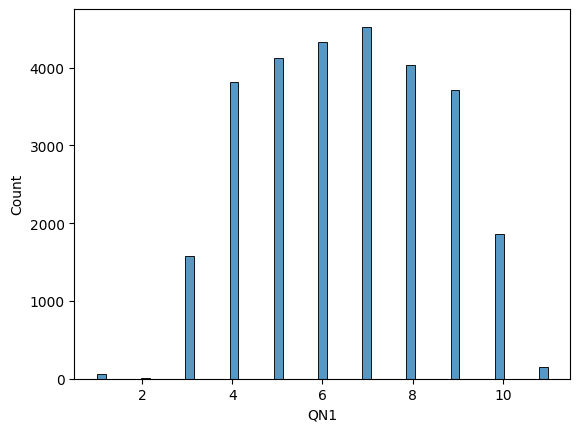

In [ ]:
sns.histplot(final_dataset['QN1'])

In [ ]:
final_dataset['QN2'].unique()
final_dataset['QN2'].value_counts()

1.0    14375
2.0    13692
Name: QN2, dtype: int64

<Axes: xlabel='QN2', ylabel='Count'>

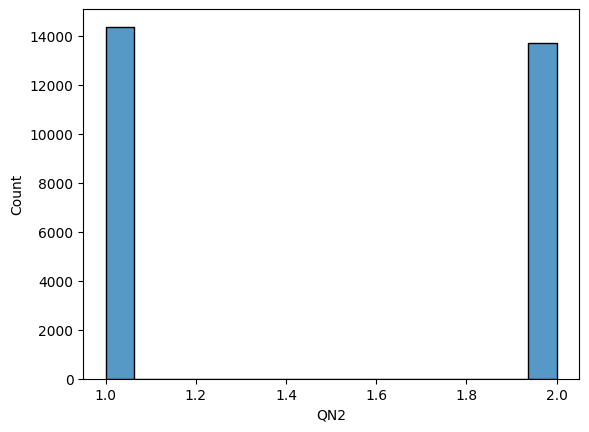

In [ ]:
sns.histplot(final_dataset['QN2'])

In [ ]:
final_dataset['QN4A'].unique()
final_dataset['QN4A'].value_counts()

1.0    20208
Name: QN4A, dtype: int64

<Axes: xlabel='QN4A', ylabel='Count'>

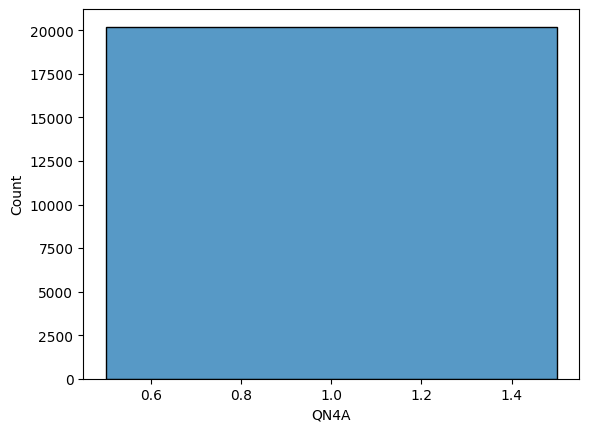

In [ ]:
sns.histplot(final_dataset['QN4A'])

In [ ]:
final_dataset['QN4B'].unique()
final_dataset['QN4B'].value_counts()

1.0    4371
Name: QN4B, dtype: int64

<Axes: xlabel='QN4B', ylabel='Count'>

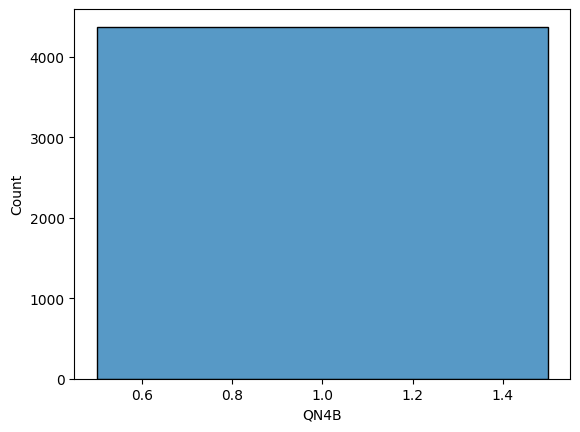

In [ ]:
sns.histplot(final_dataset['QN4B'])

In [ ]:
final_dataset['QN4C'].unique()
final_dataset['QN4C'].value_counts()

1.0    667
Name: QN4C, dtype: int64

<Axes: xlabel='QN4C', ylabel='Count'>

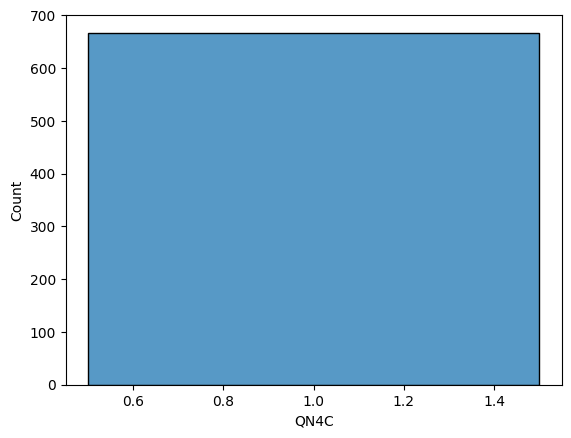

In [ ]:
sns.histplot(final_dataset['QN4C'])

In [ ]:
final_dataset['QN4D'].unique()
final_dataset['QN4D'].value_counts()

1.0    229
Name: QN4D, dtype: int64

<Axes: xlabel='QN4D', ylabel='Count'>

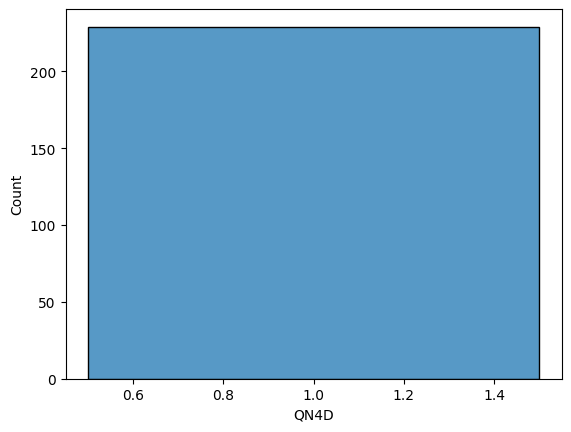

In [ ]:
sns.histplot(final_dataset['QN4D'])

In [ ]:
final_dataset['QN4E'].unique()
final_dataset['QN4E'].value_counts()

1.0    2877
Name: QN4E, dtype: int64

<Axes: xlabel='QN4E', ylabel='Count'>

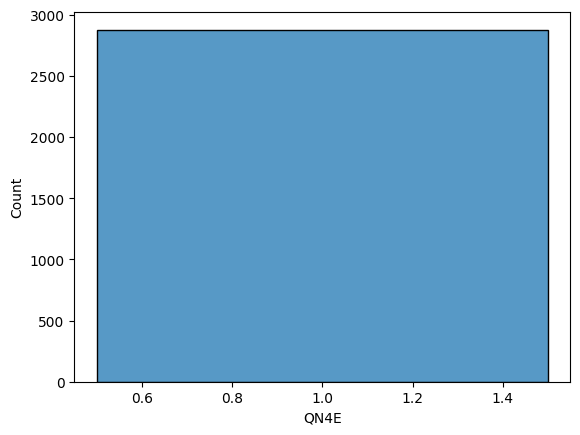

In [ ]:
sns.histplot(final_dataset['QN4E'])

In [ ]:
final_dataset['QN5A'].unique()
final_dataset['QN5A'].value_counts()

1.0    3239
Name: QN5A, dtype: int64

<Axes: xlabel='QN5A', ylabel='Count'>

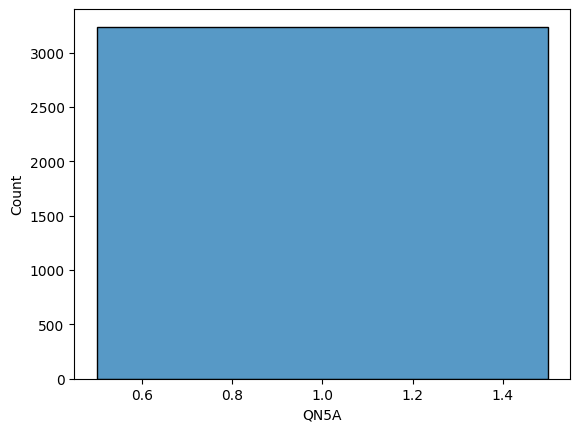

In [ ]:
sns.histplot(final_dataset['QN5A'])

In [ ]:
final_dataset['QN5B'].unique()
final_dataset['QN5B'].value_counts()

1.0    2762
Name: QN5B, dtype: int64

<Axes: xlabel='QN5B', ylabel='Count'>

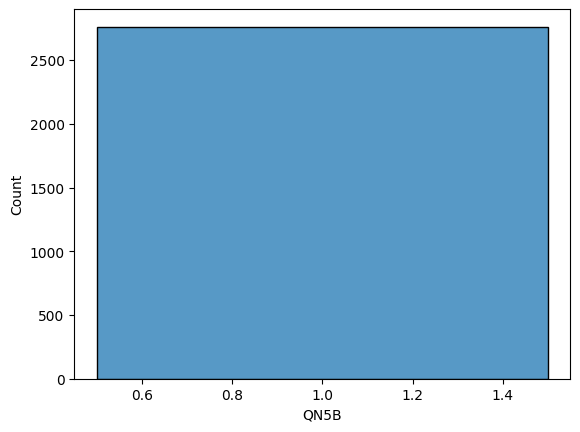

In [ ]:
sns.histplot(final_dataset['QN5B'])

In [ ]:
final_dataset['QN5C'].unique()
final_dataset['QN5C'].value_counts()

1.0    5218
Name: QN5C, dtype: int64

<Axes: xlabel='QN5C', ylabel='Count'>

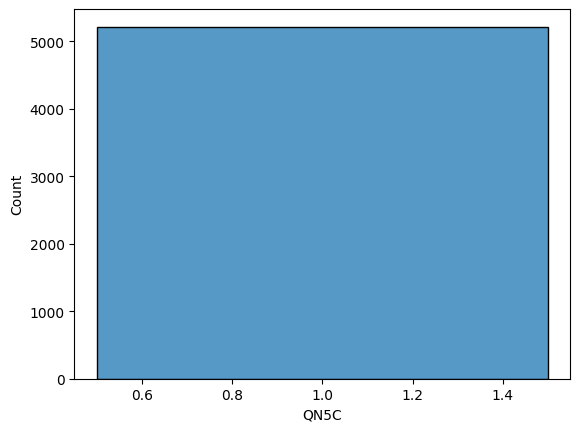

In [ ]:
sns.histplot(final_dataset['QN5C'])

In [ ]:
final_dataset['QN5D'].unique()
final_dataset['QN5D'].value_counts()

1.0    916
Name: QN5D, dtype: int64

<Axes: xlabel='QN5D', ylabel='Count'>

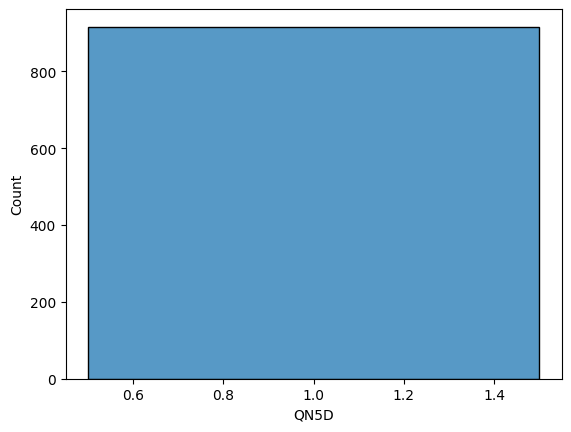

In [ ]:
sns.histplot(final_dataset['QN5D'])

In [ ]:
final_dataset['QN5E'].unique()
final_dataset['QN5E'].value_counts()

1.0    17308
Name: QN5E, dtype: int64

<Axes: xlabel='QN5E', ylabel='Count'>

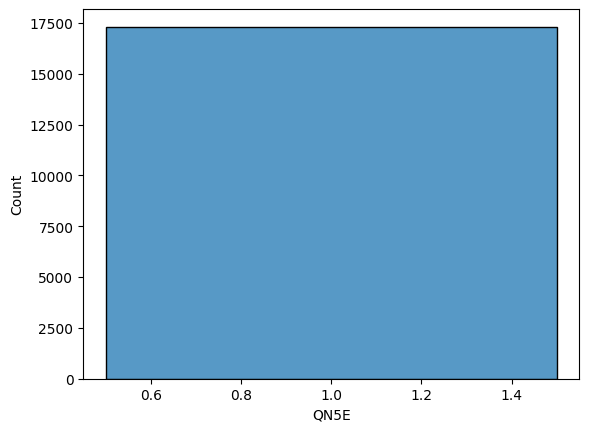

In [ ]:
sns.histplot(final_dataset['QN5E'])

In [ ]:
final_dataset['QN97'].unique()
final_dataset['QN97'].value_counts()

1.0    24804
2.0     2619
Name: QN97, dtype: int64

<Axes: xlabel='QN97', ylabel='Count'>

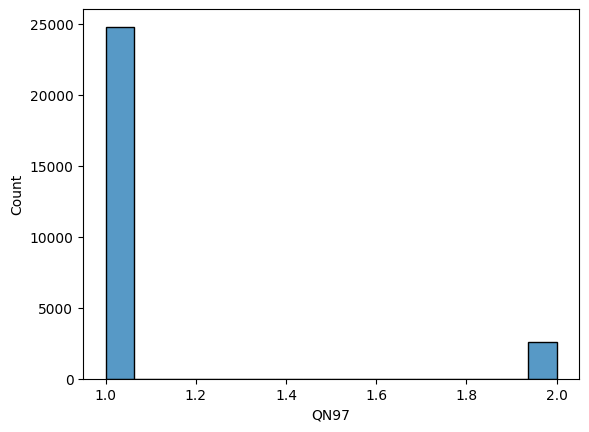

In [ ]:
sns.histplot(final_dataset['QN97'])

In [ ]:
final_dataset['QN109'].unique()
final_dataset['QN109'].value_counts()

1.0    15073
2.0     8018
3.0     4113
Name: QN109, dtype: int64

<Axes: xlabel='QN109', ylabel='Count'>

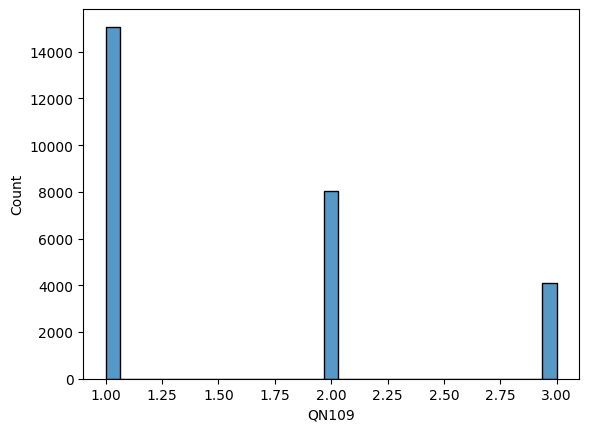

In [ ]:
sns.histplot(final_dataset['QN109'])

In [ ]:
final_dataset['QN121'].unique()
final_dataset['QN121'].value_counts()

5.0    11396
4.0    10519
3.0     2941
1.0      715
2.0      671
Name: QN121, dtype: int64

<Axes: xlabel='QN121', ylabel='Count'>

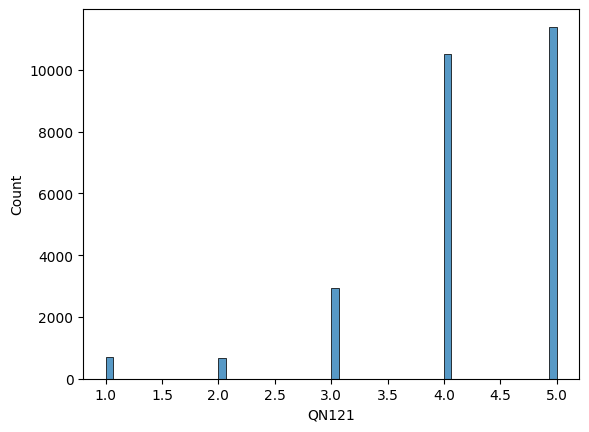

In [ ]:
sns.histplot(final_dataset['QN121'])

In [ ]:
final_dataset['QN122'].unique()
final_dataset['QN122'].value_counts()

1.0    12543
2.0    10588
3.0     1933
4.0     1453
Name: QN122, dtype: int64

<Axes: xlabel='QN122', ylabel='Count'>

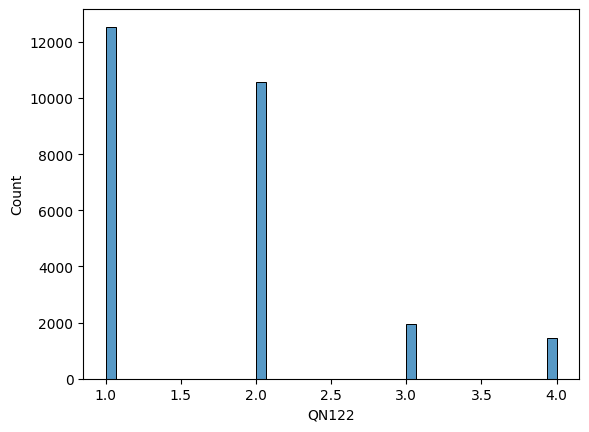

In [ ]:
sns.histplot(final_dataset['QN122'])

In [ ]:
final_dataset['QN127'].unique()
final_dataset['QN127'].value_counts()

4.0    10595
3.0     7127
2.0     6026
1.0     2431
Name: QN127, dtype: int64

<Axes: xlabel='QN127', ylabel='Count'>

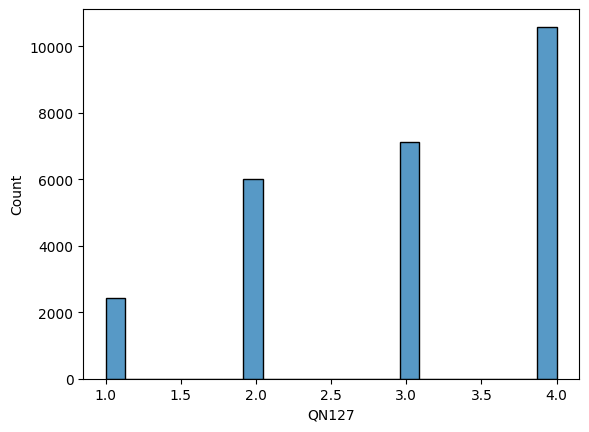

In [ ]:
sns.histplot(final_dataset['QN127'])

In [ ]:
final_dataset['QN128'].unique()
final_dataset['QN128'].value_counts()

3.0    9578
4.0    6744
2.0    6734
5.0    1887
6.0     806
1.0     743
Name: QN128, dtype: int64

<Axes: xlabel='QN128', ylabel='Count'>

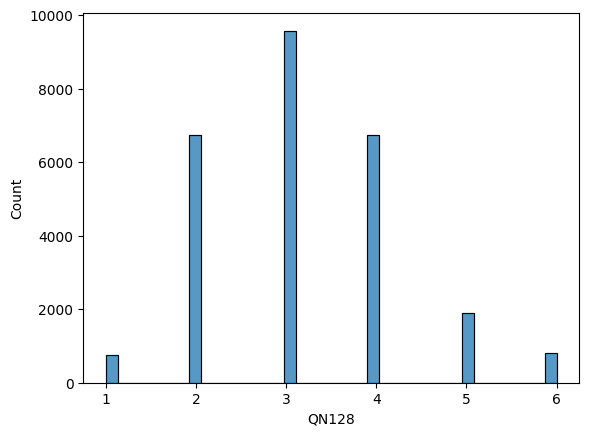

In [ ]:
sns.histplot(final_dataset['QN128'])

In [ ]:
final_dataset['QN133'].unique()
final_dataset['QN133'].value_counts()

8.0    9594
7.0    5504
6.0    4986
1.0    2231
5.0    1471
4.0    1410
2.0     668
3.0     447
Name: QN133, dtype: int64

<Axes: xlabel='QN133', ylabel='Count'>

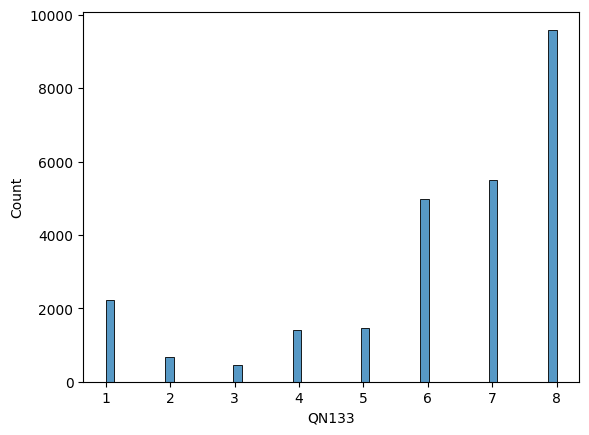

In [ ]:
sns.histplot(final_dataset['QN133'])

In [ ]:
final_dataset['QN144'].unique()
final_dataset['QN144'].value_counts()

1.0    19759
8.0     2451
2.0      920
3.0      698
4.0      654
5.0      488
6.0      434
7.0      237
Name: QN144, dtype: int64

<Axes: xlabel='QN144', ylabel='Count'>

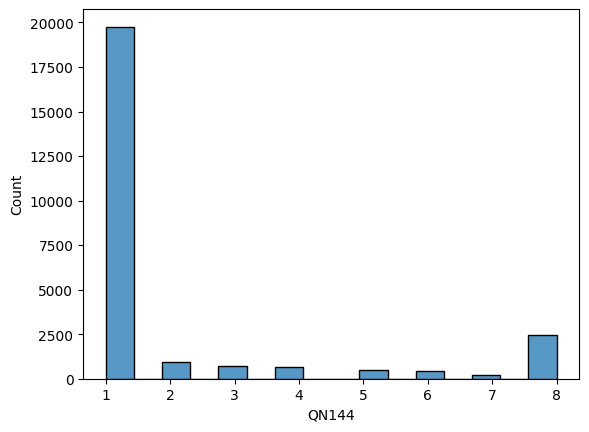

In [ ]:
sns.histplot(final_dataset['QN144'])

In [ ]:
final_dataset['QN148'].unique()
final_dataset['QN148'].value_counts()

1.0    20752
8.0     1458
2.0      862
3.0      639
4.0      637
5.0      510
6.0      368
7.0      203
Name: QN148, dtype: int64

<Axes: xlabel='QN148', ylabel='Count'>

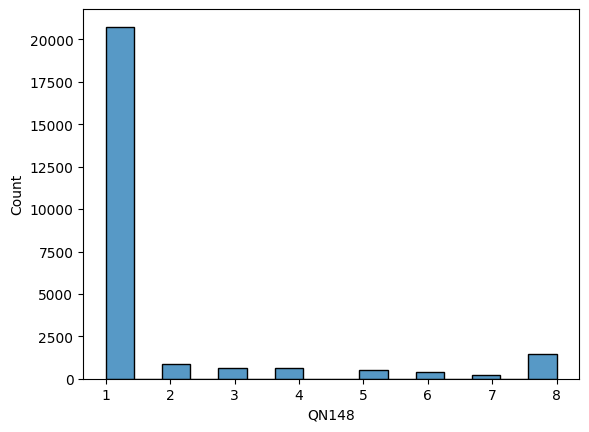

In [ ]:
sns.histplot(final_dataset['QN148'])

In [ ]:
final_dataset['QN155'].unique()
final_dataset['QN155'].value_counts()

1.0    18740
3.0     3002
4.0     2547
2.0     1146
Name: QN155, dtype: int64

<Axes: xlabel='QN155', ylabel='Count'>

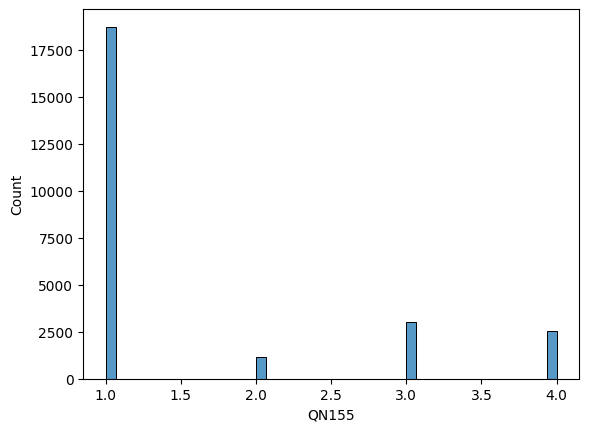

In [ ]:
sns.histplot(final_dataset['QN155'])

In [ ]:
final_dataset['QN166'].unique()
final_dataset['QN166'].value_counts()

2.0    16465
1.0     8582
Name: QN166, dtype: int64

<Axes: xlabel='QN166', ylabel='Count'>

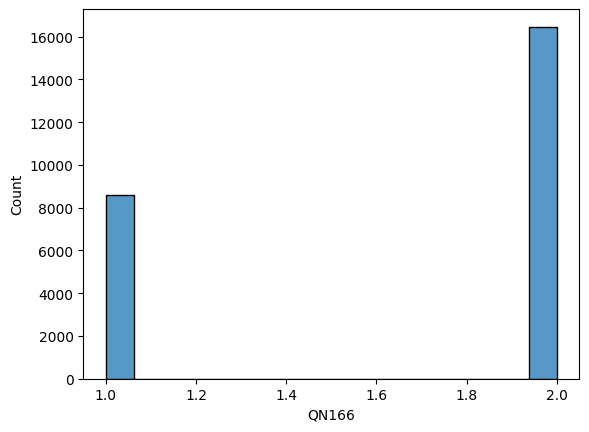

In [ ]:
sns.histplot(final_dataset['QN166'])

In [ ]:
final_dataset['QN6'].unique()
final_dataset['QN6'].value_counts()

2.0    22372
1.0     5808
Name: QN6, dtype: int64

<Axes: xlabel='QN6', ylabel='Count'>

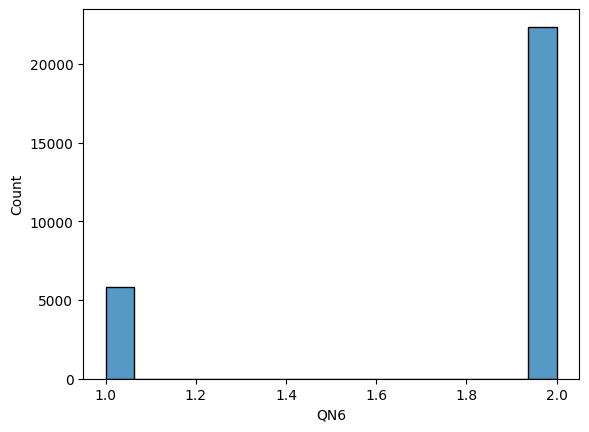

In [ ]:
sns.histplot(final_dataset['QN6'])

In [ ]:
final_dataset['QN8'].unique()
final_dataset['QN8'].value_counts()

1.0    1707
2.0    1393
6.0    1335
3.0     459
4.0     456
5.0     363
Name: QN8, dtype: int64

<Axes: xlabel='QN8', ylabel='Count'>

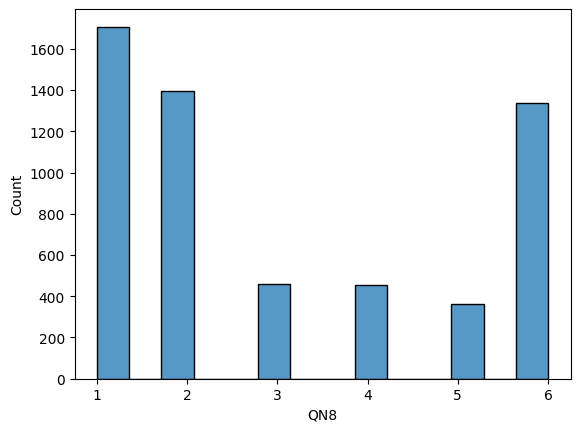

In [ ]:
sns.histplot(final_dataset['QN8'])

### **➕ Renaming Columns ➕**


---






In [ ]:
print(df.columns)

Index(['QN1', 'QN2', 'QN4A', 'QN4B', 'QN4C', 'QN4D', 'QN4E', 'QN5A', 'QN5B',
       'QN5C', 'QN5D', 'QN5E', 'QN97', 'QN109', 'QN121', 'QN122', 'QN127',
       'QN128', 'QN133', 'QN144', 'QN148', 'QN155', 'QN166',
       'Addiction classification'],
      dtype='object')


In [ ]:
df = df.rename(columns = {"QN1":"Age", "QN2":"Sex", "QN4A":"Not Hispanic, Latino, Latina, or Spanish origin", "QN4B": "Mexican, Mexican American, Chicano, or Chicana",
                     "QN4C":"Puerto Rican", "QN4D":"Cuban", "QN4E": "Other Hispanic, Latino, Latina, or Spanish origin", "QN5A":"American Indian or Alaska Native",
                     "QN5B":"Asian", "QN5C":"Black or African American", "QN5D":"Native Hawaiian or Other Pacific Islander", "QN5E":"White",
                     "QN97":"Doctor visited in the past year", "QN109":"Exposure to anti-tobacco campaigns", "QN121":"Knowledge about nicotine content in e-cigarettes",
                     "QN122":"Perceived danger of e-cigarettes", "QN127":"Friends' perception of e-cigarettes", "QN128":"Exposure to tobacco ads",
                     "QN133":"Social media use", "QN144":"Tobacco use in home in past 30 days", "QN148":"Tobacco use in home in past 7 days", "QN155":"Sexuality",
                     "QN166":"Impairment"})


### **➕ Maintaining Equal Distribution Sample Sizes ➕**


---



In [ ]:
# Sorting values by their addiction classification
df = df.sort_values(by='Addiction classification')

In [ ]:
# Visualizing the distribution of data in addiction classification
df['Addiction classification'].value_counts()

0.0    20029
1.0     1522
3.0      984
2.0      637
Name: Addiction classification, dtype: int64

Removing values in the not-addicted data to equal the number of values in other columns:

In [ ]:
df = df.tail(4643)

In [ ]:
df['Addiction classification'].value_counts()

1.0    1522
0.0    1500
3.0     984
2.0     637
Name: Addiction classification, dtype: int64

### **➕ Dealing with Null Values ➕**


---



Removing null values in certain columns:

In [ ]:
df = final_dataset.dropna(subset = ["QN97", "QN109", "QN121", "QN122", "QN127", "QN128", "QN133", "QN144", "QN148", "QN155", "QN166", "QN6"])

In [ ]:
df.shape

(23227, 25)

In [ ]:
# Visualizing the amount of null values in the remaining columns
np.sum(df.isna())

QN1         23
QN2         99
QN4A      6097
QN4B     19803
QN4C     22716
QN4D     23055
QN4E     20972
QN5A     20611
QN5B     20874
QN5C     19140
QN5D     22496
QN5E      8424
QN97         0
QN109        0
QN121        0
QN122        0
QN127        0
QN128        0
QN133        0
QN144        0
QN148        0
QN155        0
QN166        0
QN6          0
QN8      18674
dtype: int64

In [ ]:
# Filling null values in column 1 with the mean value
df["QN1"].fillna(df["QN1"].mean(), inplace = True)

<ipython-input-65-ecd1d4b754c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QN1"].fillna(df["QN1"].mean(), inplace = True)


In [ ]:
# Creating new values for column 2's null values using a randomized number between 1 and 2
import math
import random
QN2_newval = []
for val in df["QN2"]:
  if math.isnan(val):
    random_val = random.randint(1, 2)
    QN2_newval.append(random_val)
  else:
    QN2_newval.append(val)

In [ ]:
# Replacing column 2 with the new column 2 without null values
df["QN2"] = QN2_newval

<ipython-input-67-29c6ab5e4a77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QN2"] = QN2_newval


In [ ]:
# Replacing null values in certain columns with 0
df["QN4A"].fillna(0, inplace = True)
df["QN4B"].fillna(0, inplace = True)
df["QN4C"].fillna(0, inplace = True)
df["QN4D"].fillna(0, inplace = True)
df["QN4E"].fillna(0, inplace = True)
df["QN5A"].fillna(0, inplace = True)
df["QN5B"].fillna(0, inplace = True)
df["QN5C"].fillna(0, inplace = True)
df["QN5D"].fillna(0, inplace = True)
df["QN5E"].fillna(0, inplace = True)

<ipython-input-68-650256211f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QN4A"].fillna(0, inplace = True)
<ipython-input-68-650256211f1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QN4B"].fillna(0, inplace = True)
<ipython-input-68-650256211f1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QN4C"].fillna(0, inplace = True)
<ipython-input-68-650256211f1d>:5: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
# Visualizing the amount of null values in the remaining columns
np.sum(df.isna())

QN1          0
QN2          0
QN4A         0
QN4B         0
QN4C         0
QN4D         0
QN4E         0
QN5A         0
QN5B         0
QN5C         0
QN5D         0
QN5E         0
QN97         0
QN109        0
QN121        0
QN122        0
QN127        0
QN128        0
QN133        0
QN144        0
QN148        0
QN155        0
QN166        0
QN6          0
QN8      18674
dtype: int64

Visualizing the distribution of data for QN6 and QN8:

In [ ]:
df['QN6'].unique()
df['QN6'].value_counts()

2.0    18619
1.0     4608
Name: QN6, dtype: int64

In [ ]:
df['QN8'].unique()
df['QN8'].value_counts()

1.0    1410
2.0    1151
6.0     984
3.0     371
4.0     355
5.0     282
Name: QN8, dtype: int64

**Classification**

Never used + 1 day + 2 to 10 days for no addiction (0)

11 to 20 days + 21 to 50 days for mildly addicted (1)

51 days to 100 days for addicted (2)

Over 100 days severely addicted (3)

Using classification to assign data in QN8 to an addiction classification:

In [ ]:
import math

In [ ]:
addiction_classification = []
for i in range(23227):
  value = df.iloc[i]['QN6']
  # print(value)
  if value == 2.0:
    addiction_classification.append(0)
  else:
    QN8_value = df.iloc[i]['QN8']
    # print(QN8_value)
    if QN8_value == 1.0:
      addiction_classification.append(0)
    if QN8_value == 2.0 or QN8_value == 3.0:
      # print("here")
      addiction_classification.append(1)
    if QN8_value == 4.0 or QN8_value == 5.0:
      addiction_classification.append(2)
    if QN8_value == 6.0:
      addiction_classification.append(3)
    if math.isnan(QN8_value):
      addiction_classification.append(float('nan'))


In [ ]:
print(len(addiction_classification))

23227


Replacing QN6 and QN8 with the new addiction classification:

In [ ]:
df.drop(columns=['QN6','QN8'], inplace=True)

<ipython-input-75-5a9513ea04cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['QN6','QN8'], inplace=True)


In [ ]:
df['Addiction classification'] = addiction_classification

<ipython-input-76-4d0a275ac901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Addiction classification'] = addiction_classification


Removing null values from the addiction classification column:

In [ ]:
np.sum(df['Addiction classification'].isna())

55

In [ ]:
df = df.dropna(subset = ["Addiction classification"])

In [ ]:
np.sum(df['Addiction classification'].isna())

0

In [ ]:
df['Addiction classification'].value_counts()

0.0    20029
1.0     1522
3.0      984
2.0      637
Name: Addiction classification, dtype: int64

### **➕ Visualizing Refined Data ➕**


---







Slight correlation between age and addiction classification—the older the subject, the more likely there is to be an addiction

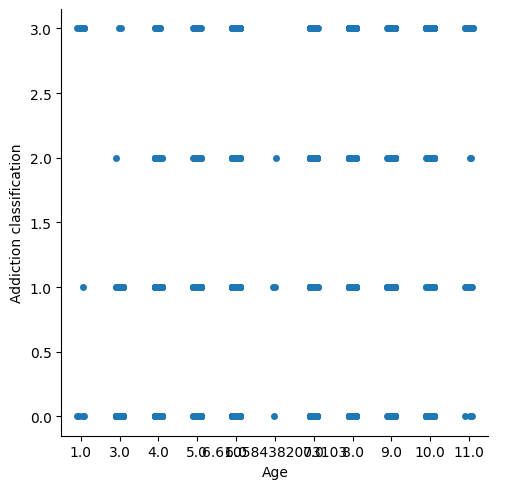

In [ ]:
sns.catplot(x = df['Age'], y = df['Addiction classification'])

No correlation between sex and addiction classification

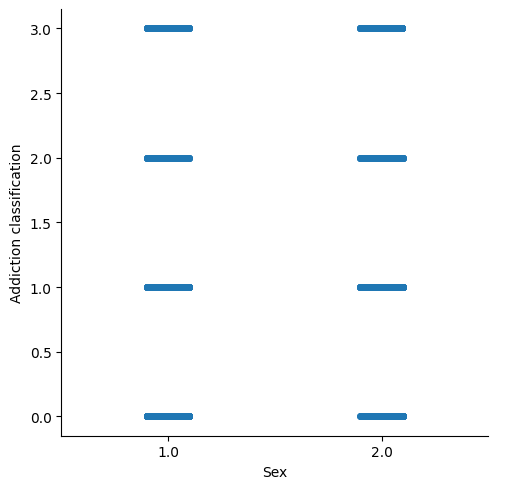

In [ ]:
sns.catplot(x = df['Sex'], y = df['Addiction classification'])

No correlation between being of Hispanic, Latino, Latina, or Spanish origin and addiction classification



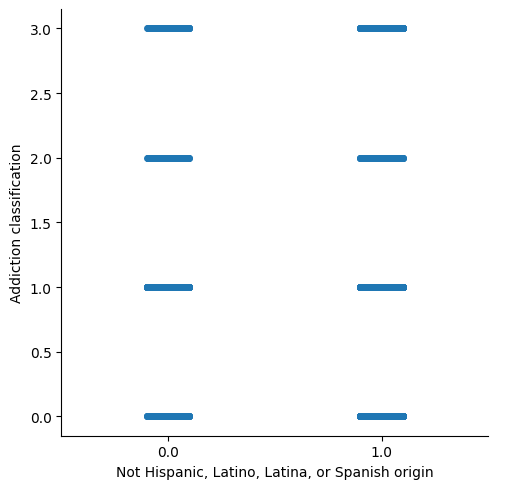

In [ ]:
sns.catplot(x = df['Not Hispanic, Latino, Latina, or Spanish origin'], y = df['Addiction classification'])

No correlation between being Mexican, Mexican American, Chicano, or Chicana and addiction classification

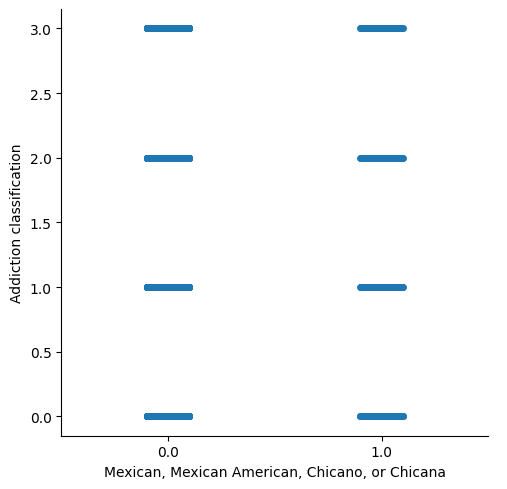

In [ ]:
sns.catplot(x = df['Mexican, Mexican American, Chicano, or Chicana'], y = df['Addiction classification'])

Slight correlation between being Puerto Rican and addiction classification—less likely to be addicted

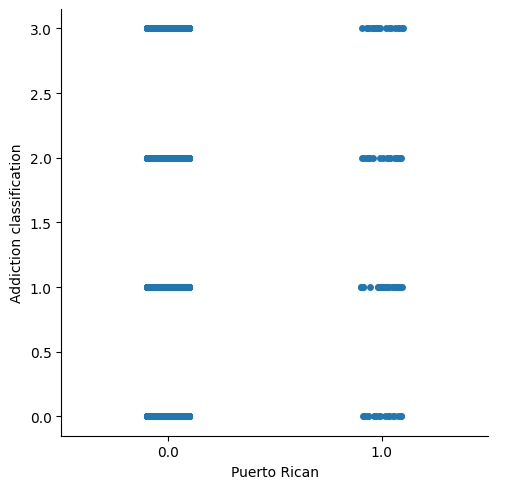

In [ ]:
sns.catplot(x = df['Puerto Rican'], y = df['Addiction classification'])

Moderate correlation between being Cuban and addiction classification—less likely to be addicted

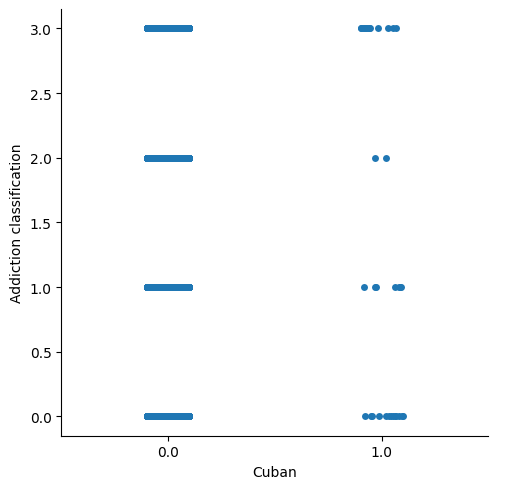

In [ ]:
sns.catplot(x = df['Cuban'], y = df['Addiction classification'])

No correlation between being of other Hispanic, Latino, Latina, or Spanish origin and addiction classification

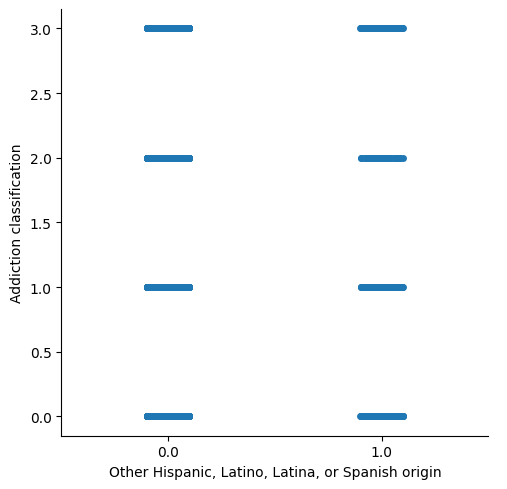

In [ ]:
sns.catplot(x = df['Other Hispanic, Latino, Latina, or Spanish origin'], y = df['Addiction classification'])

No correlation between being American Indian or Alaska Native and addiction classification

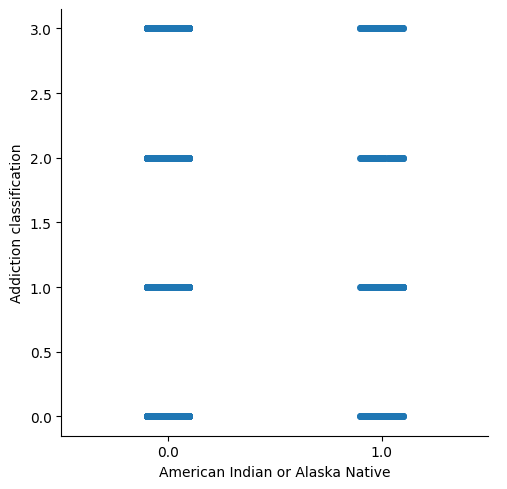

In [ ]:
sns.catplot(x = df['American Indian or Alaska Native'], y = df['Addiction classification'])

No correlation between being Asian and addiction classification

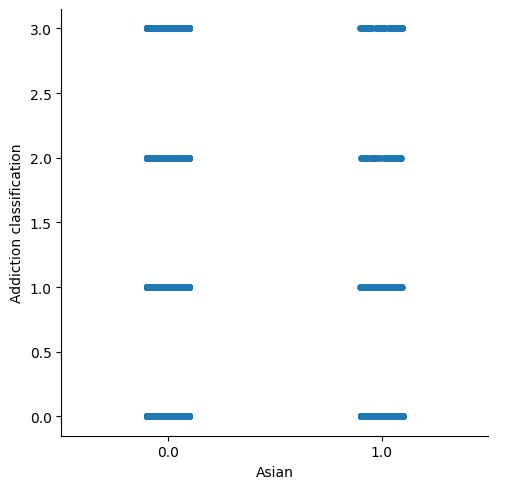

In [ ]:
sns.catplot(x = df['Asian'], y = df['Addiction classification'])

No correlation between being Black or African American and addiction classification

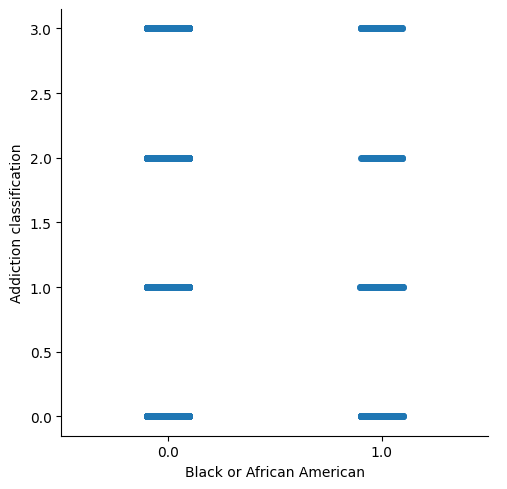

In [ ]:
sns.catplot(x = df['Black or African American'], y = df['Addiction classification'])

Slight correlation between being Native Hawaiian or other Pacific Islander and addiction classification—less likely to be addicted

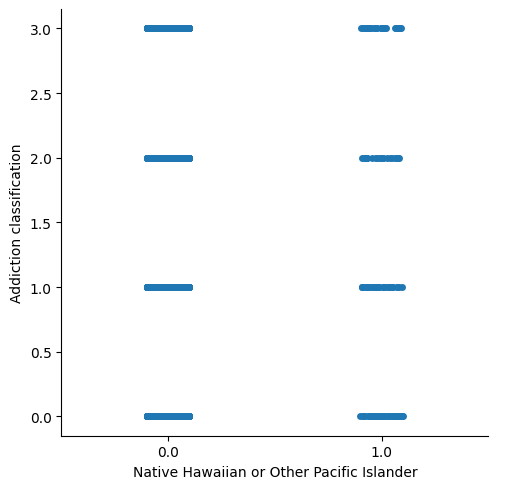

In [ ]:
sns.catplot(x = df['Native Hawaiian or Other Pacific Islander'], y = df['Addiction classification'])

No correlation between being White and addiction classification

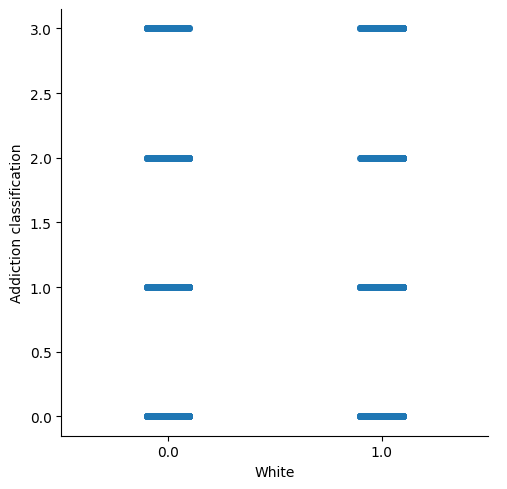

In [ ]:
sns.catplot(x = df['White'], y = df['Addiction classification'])

No correlation between having visited the doctor in the past year and addiction classification

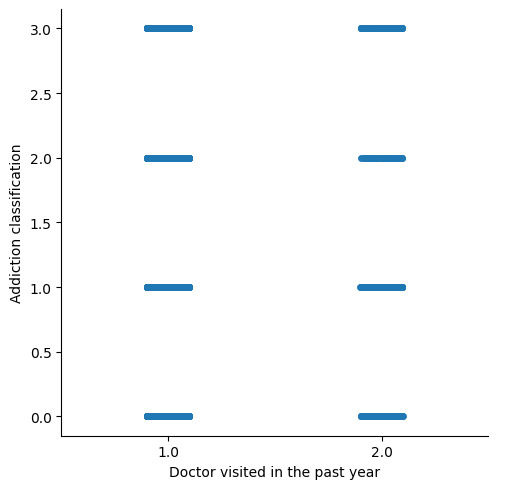

In [ ]:
sns.catplot(x = df['Doctor visited in the past year'], y = df['Addiction classification'])

No correlation between having exposure to anti-tobacco campaigns and addiction classification

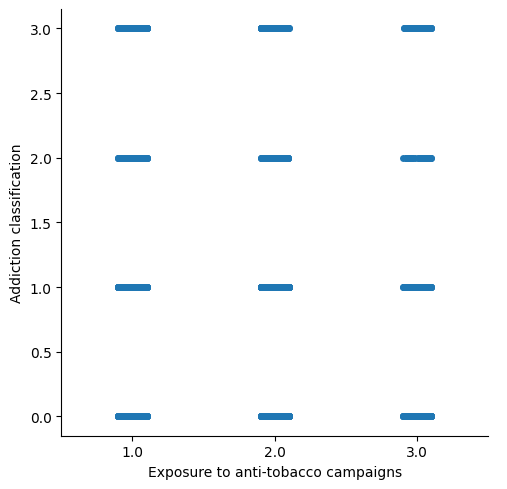

In [ ]:
sns.catplot(x = df['Exposure to anti-tobacco campaigns'], y = df['Addiction classification'])

Slight correlation between knowing about nicotine content in e-cigarrettes and addiction classification—those who think they don't contain nicotine are still less likely to be moderately addicted

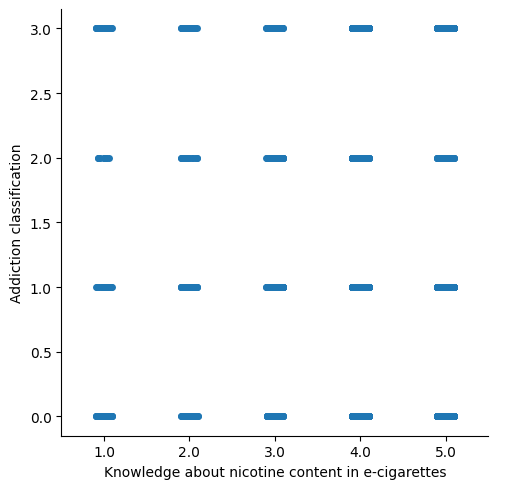

In [ ]:
sns.catplot(x = df['Knowledge about nicotine content in e-cigarettes'], y = df['Addiction classification'])

Slight correlation between perceived danger of e-cigarettes and addiction classification—the more dangerous e-cigarettes were perceived to be, the less likely they were to be addicted

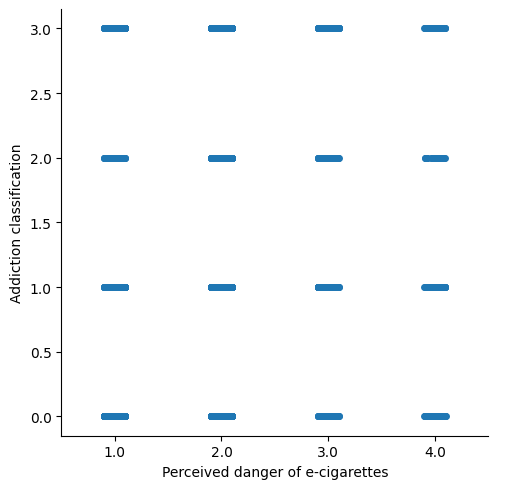

In [ ]:
sns.catplot(x = df['Perceived danger of e-cigarettes'], y = df['Addiction classification'])

Slight correlation between friends' perception of e-cigarettes and addiction classification—those who have friends that think e-cigarettes are more acceptable are more likely to be addicted

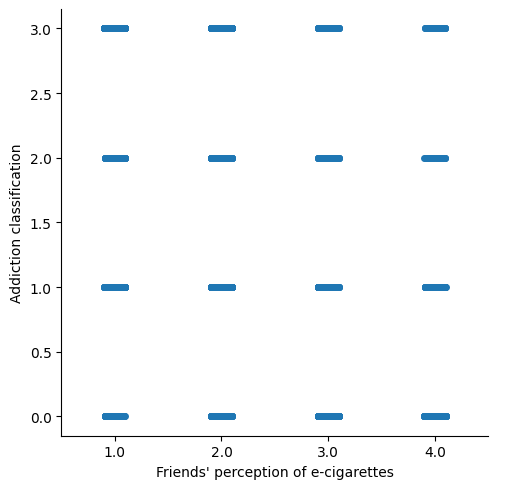

In [ ]:
sns.catplot(x = df["Friends' perception of e-cigarettes"], y = df['Addiction classification'])

No correlation between having exposure to tobacco ads and addiction classification

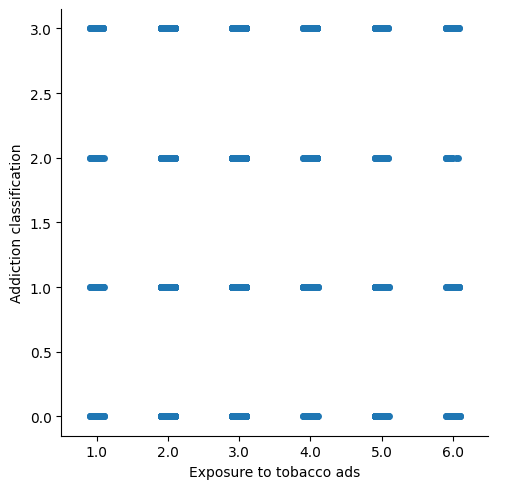

In [ ]:
sns.catplot(x = df['Exposure to tobacco ads'], y = df['Addiction classification'])

No (visible?) correlation between being social media use and addiction classification–the two extremes (barely using social media and heavily using social media) have a slight increase in addiction rates

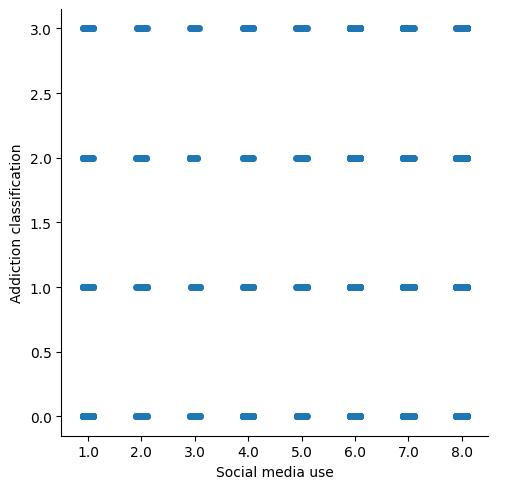

In [ ]:
sns.catplot(x = df['Social media use'], y = df['Addiction classification'])

Slight correlation between tobacco use in home in past 30 days and addiction classification–the two extremes have a slight increase in addiction rates

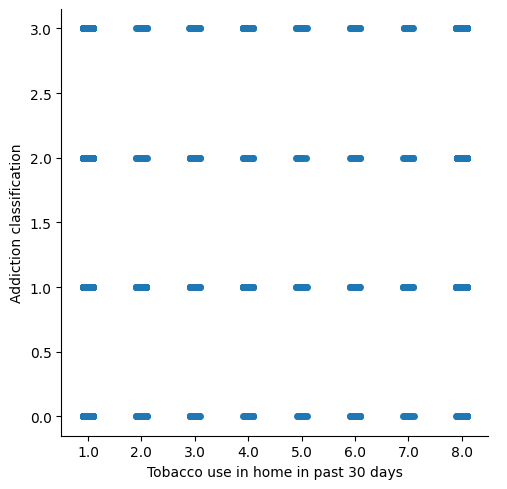

In [ ]:
sns.catplot(x = df['Tobacco use in home in past 30 days'], y = df['Addiction classification'])

Slight correlation between tobacco use in home in past 7 days and addiction classification–the two extremes have a slight increase in addiction rates

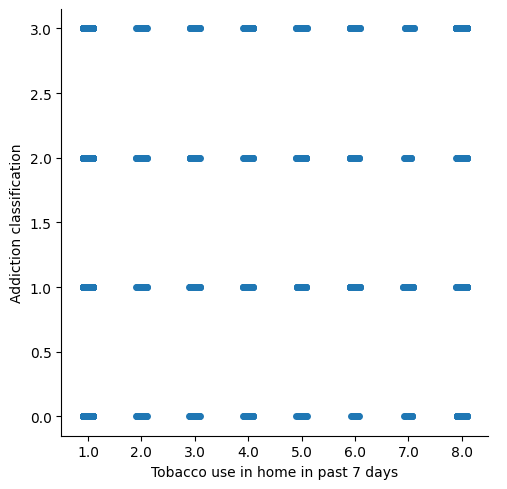

In [ ]:
sns.catplot(x = df['Tobacco use in home in past 7 days'], y = df['Addiction classification'])

No correlation between sexuality and addiction classification

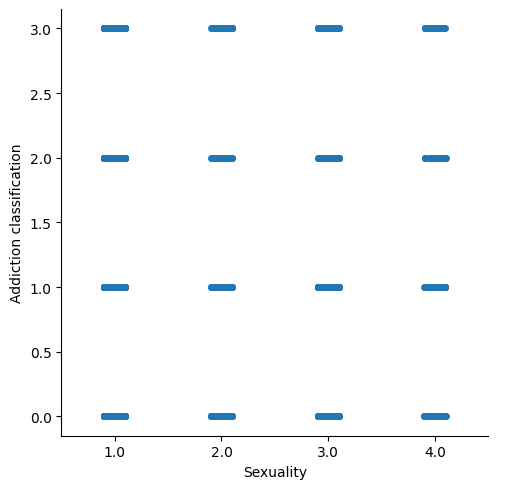

In [ ]:
sns.catplot(x = df['Sexuality'], y = df['Addiction classification'])

No correlation between impairment and addiction classification

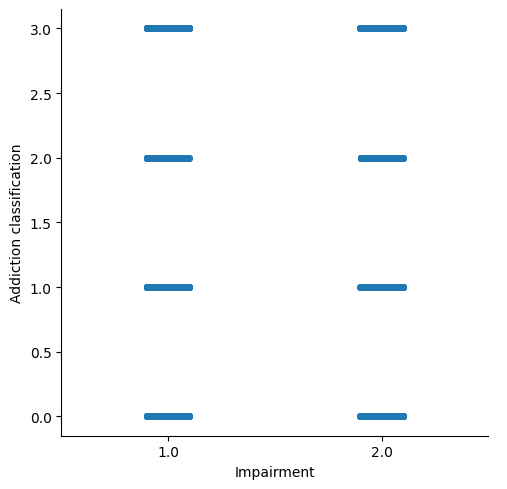

In [ ]:
sns.catplot(x = df['Impairment'], y = df['Addiction classification'])

### **➕ Training Logistic Regression Model ➕**


---



In [ ]:
# Defining X and y variables
y = df['Addiction classification']
X = df.drop(columns='Addiction classification')

In [ ]:
# Splitting the dataset into training and testing set and visualizing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3714, 23)
(929, 23)
(3714,)
(929,)


In [ ]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [ ]:
# Training the logistic regression model
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Storing predictions
predictions = logistic_model.predict(X_test)

In [ ]:
# Assessing accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

Logistic Regression Model Accuracy: 54.79%


In [ ]:
# Assessing precision
from sklearn.metrics import precision_score
score = precision_score(y_test, predictions, average="weighted")
print('Logistic Regression Model Precision: {:.2%}'.format(score))

Logistic Regression Model Precision: 52.41%


In [ ]:
# Assessing recall
from sklearn.metrics import recall_score
score = recall_score(y_test, predictions, average="weighted")
print('Logistic Regression Model Recall: {:.2%}'.format(score))

Logistic Regression Model Recall: 54.79%


In [ ]:
# Assessing f1
from sklearn.metrics import f1_score
score = f1_score(y_test, predictions, average="weighted")
print('Logistic Regression Model F1: {:.2%}'.format(score))

Logistic Regression Model F1: 51.34%


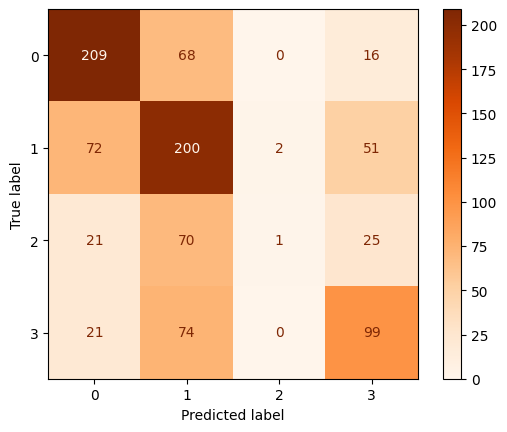

In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges');

### **➕ Training K Nearest Neighbors Model ➕**


---





In [ ]:
# Importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating a KNN model
knn = KNeighborsClassifier()

In [ ]:
# Training the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Storing predictions
predictions = knn.predict(X_test)

In [ ]:
# Assessing accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the KNN model: {accuracy:.2f}")

Accuracy of the KNN model: 0.46


In [ ]:
# Assessing precision
score = precision_score(y_test, predictions, average="weighted")
print('KNN precision: {:.2%}'.format(score))

KNN precision: 43.80%


In [ ]:
# Assessing recall
score = recall_score(y_test, predictions, average="weighted")
print('KNN recall: {:.2%}'.format(score))

KNN recall: 46.39%


In [ ]:
# Assessing F1
score = f1_score(y_test, predictions, average="weighted")
print('KNN F1: {:.2%}'.format(score))

KNN F1: 44.65%


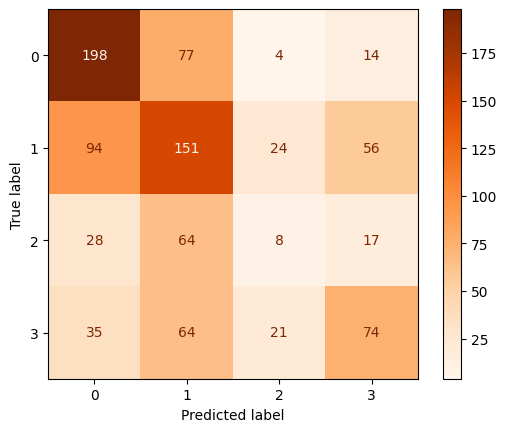

In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges');

TUNING KNN MODEL

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for n in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    print(n)
    print(f"KNN accuracy: {accuracy:.2f}")
    precision = precision_score(y_test, predictions, average="weighted")
    precision_scores.append(precision)
    print("KNN precision: {:.2f}".format(precision))
    recall = recall_score(y_test, predictions, average="weighted")
    recall_scores.append(recall)
    print("KNN recall: {:.2f}".format(recall))
    f1 = f1_score(y_test, predictions, average="weighted")
    f1_scores.append(f1)
    print("KNN F1: {:.2f}".format(f1))
    print("\n")

1
KNN accuracy: 0.44
KNN precision: 0.45
KNN recall: 0.44
KNN F1: 0.45


2
KNN accuracy: 0.44
KNN precision: 0.44
KNN recall: 0.44
KNN F1: 0.42


3
KNN accuracy: 0.47
KNN precision: 0.44
KNN recall: 0.47
KNN F1: 0.45


4
KNN accuracy: 0.47
KNN precision: 0.45
KNN recall: 0.47
KNN F1: 0.45


5
KNN accuracy: 0.46
KNN precision: 0.44
KNN recall: 0.46
KNN F1: 0.45


6
KNN accuracy: 0.46
KNN precision: 0.44
KNN recall: 0.46
KNN F1: 0.44


7
KNN accuracy: 0.48
KNN precision: 0.45
KNN recall: 0.48
KNN F1: 0.46


8
KNN accuracy: 0.49
KNN precision: 0.46
KNN recall: 0.49
KNN F1: 0.47


9
KNN accuracy: 0.50
KNN precision: 0.47
KNN recall: 0.50
KNN F1: 0.48


10
KNN accuracy: 0.51
KNN precision: 0.49
KNN recall: 0.51
KNN F1: 0.50


11
KNN accuracy: 0.51
KNN precision: 0.48
KNN recall: 0.51
KNN F1: 0.49


12
KNN accuracy: 0.50
KNN precision: 0.48
KNN recall: 0.50
KNN F1: 0.48


13
KNN accuracy: 0.51
KNN precision: 0.49
KNN recall: 0.51
KNN F1: 0.50


14
KNN accuracy: 0.51
KNN precision: 0.49
KNN r

In [ ]:
print("The best number of neighbors for accuracy is: ", np.argmax(accuracy_scores) + 1)
print("Highest accuracy is: ", np.max(accuracy_scores))

The best number of neighbors for accuracy is:  15
Highest accuracy is:  0.5263724434876211


In [ ]:
print("The best max depth for precision is: ", np.argmax(precision_scores) + 1)
print("Highest precision is: ", np.max(precision_scores))

The best max depth for precision is:  15
Highest precision is:  0.4980331889234977


In [ ]:
print("The best max depth for recall is: ", np.argmax(recall_scores) + 1)
print("Highest recall is: ", np.max(recall_scores))

The best max depth for recall is:  15
Highest recall is:  0.5263724434876211


In [ ]:
print("The best max depth for f1 is: ", np.argmax(f1_scores) + 1)
print("Highest f1 is: ", np.max(f1_scores))

The best max depth for f1 is:  15
Highest f1 is:  0.5040904965666047


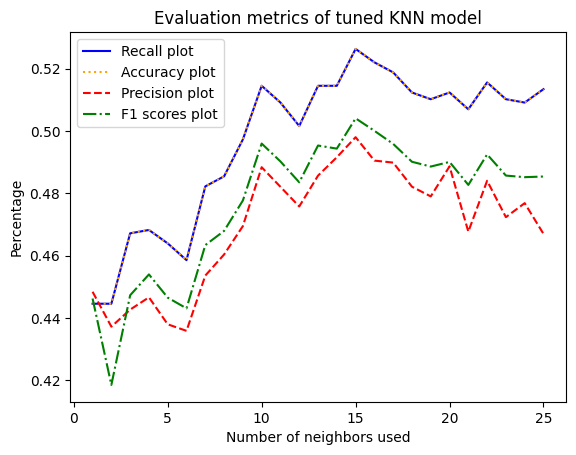

In [ ]:
plt.plot(range(1, 26), recall_scores, linestyle='solid',color='blue', label='Recall plot')
plt.plot(range(1, 26), accuracy_scores, linestyle='dotted',color='orange', label='Accuracy plot')
plt.plot(range(1, 26), precision_scores, linestyle='dashed',color='red', label='Precision plot')
plt.plot(range(1, 26), f1_scores, linestyle='dashdot',color='green', label='F1 scores plot')

plt.title('Evaluation metrics of tuned KNN model')
plt.xlabel('Number of neighbors used')
plt.ylabel('Percentage')
plt.legend(loc='best')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30, 40],}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1)

# Fitting the model for grid search
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.48869752421959095
Precision: 0.4560204962494164
Recall: 0.48869752421959095
F1 Score: 0.46813009843365744


### **➕ Training Decision Trees Model ➕**

---



In [ ]:
# Importing decision tree model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating a decision tree model
decision_tree = DecisionTreeClassifier()

In [ ]:
# Training the decision tree model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Storing predictions
predictions = decision_tree.predict(X_test)

In [ ]:
# Assessing accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

Accuracy of the Decision Tree model: 0.42


In [ ]:
# Assessing precision
score = precision_score(y_test, predictions, average="weighted")
print('Decision tree precision: {:.2%}'.format(score))

Decision tree precision: 42.60%


In [ ]:
# Assessing recall
score = recall_score(y_test, predictions, average="weighted")
print('Decision tree recall: {:.2%}'.format(score))

Decision tree recall: 42.41%


In [ ]:
# Assessing f1
score = f1_score(y_test, predictions, average="weighted")
print('Decision tree F1: {:.2%}'.format(score))

Decision tree F1: 42.49%


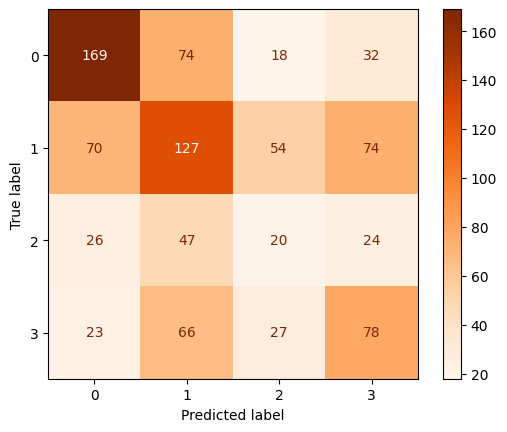

In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges');

TUNING DECISION TREES MODEL

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for d in range(1, 26):
  decision_tree = DecisionTreeClassifier(max_depth = d)
  decision_tree.fit(X_train, y_train)
  predictions = decision_tree.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracy_scores.append(accuracy)
  print(d)
  print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")
  score = precision_score(y_test, predictions, average="weighted")
  precision_scores.append(score)
  print('Decision tree precision: {:.2%}'.format(score))
  score = recall_score(y_test, predictions, average="weighted")
  recall_scores.append(score)
  print('Decision tree recall: {:.2%}'.format(score))
  score = f1_score(y_test, predictions, average="weighted")
  f1_scores.append(score)
  print('Decision tree F1: {:.2%}'.format(score))
  print('\n')

1
Accuracy of the Decision Tree model: 0.47
Decision tree precision: 31.75%
Decision tree recall: 46.82%
Decision tree F1: 37.73%


2
Accuracy of the Decision Tree model: 0.51
Decision tree precision: 45.80%
Decision tree recall: 50.81%
Decision tree F1: 46.21%


3
Accuracy of the Decision Tree model: 0.50
Decision tree precision: 43.72%
Decision tree recall: 49.95%
Decision tree F1: 46.61%


4
Accuracy of the Decision Tree model: 0.51
Decision tree precision: 45.28%
Decision tree recall: 51.13%
Decision tree F1: 47.68%


5
Accuracy of the Decision Tree model: 0.51
Decision tree precision: 46.00%
Decision tree recall: 51.45%
Decision tree F1: 48.15%


6
Accuracy of the Decision Tree model: 0.50
Decision tree precision: 47.81%
Decision tree recall: 50.38%
Decision tree F1: 46.92%


7
Accuracy of the Decision Tree model: 0.50
Decision tree precision: 46.57%
Decision tree recall: 49.95%
Decision tree F1: 47.54%


8
Accuracy of the Decision Tree model: 0.48
Decision tree precision: 43.86%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

11
Accuracy of the Decision Tree model: 0.47
Decision tree precision: 44.91%
Decision tree recall: 46.61%
Decision tree F1: 45.53%


12
Accuracy of the Decision Tree model: 0.43
Decision tree precision: 42.13%
Decision tree recall: 43.49%
Decision tree F1: 42.73%


13
Accuracy of the Decision Tree model: 0.44
Decision tree precision: 42.83%
Decision tree recall: 43.70%
Decision tree F1: 43.19%


14
Accuracy of the Decision Tree model: 0.41
Decision tree precision: 40.52%
Decision tree recall: 41.01%
Decision tree F1: 40.60%


15
Accuracy of the Decision Tree model: 0.41
Decision tree precision: 40.69%
Decision tree recall: 41.33%
Decision tree F1: 41.00%


16
Accuracy of the Decision Tree model: 0.42
Decision tree precision: 42.04%
Decision tree recall: 42.20%
Decision tree F1: 42.08%


17
Accuracy of the Decision Tree model: 0.42
Decision tree precision: 42.30%
Decision tree recall: 42.30%
Decision tree F1: 42.30%


18
Accuracy of the Decision Tree model: 0.42
Decision tree precision:

In [ ]:
print("The best max depth for accuracy is: ", np.argmax(accuracy_scores) + 1)
print("Highest accuracy is: ", np.max(accuracy_scores))

The best max depth for accuracy is:  5
Highest accuracy is:  0.5145317545748116


In [ ]:
print("The best max depth for precision is: ", np.argmax(precision_scores) + 1)
print("Highest precision is: ", np.max(precision_scores))

The best max depth for precision is:  6
Highest precision is:  0.4780810474359857


In [ ]:
print("The best max depth for recall is: ", np.argmax(recall_scores) + 1)
print("Highest recall is: ", np.max(recall_scores))

The best max depth for recall is:  5
Highest recall is:  0.5145317545748116


In [ ]:
print("The best max depth for f1 score is: ", np.argmax(f1_scores) + 1)
print("Highest f1 is: ", np.max(f1_scores))

The best max depth for f1 score is:  5
Highest f1 is:  0.48148300956806983


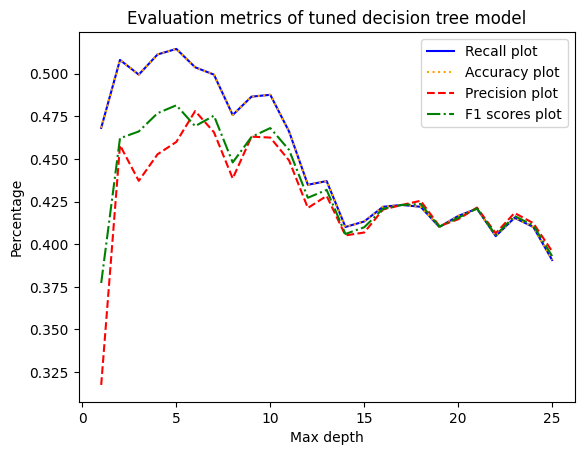

In [ ]:
plt.plot(range(1, 26), recall_scores, linestyle='solid',color='blue', label='Recall plot')
plt.plot(range(1, 26), accuracy_scores, linestyle='dotted',color='orange', label='Accuracy plot')
plt.plot(range(1, 26), precision_scores, linestyle='dashed',color='red', label='Precision plot')
plt.plot(range(1, 26), f1_scores, linestyle='dashdot',color='green', label='F1 scores plot')

plt.title('Evaluation metrics of tuned decision tree model')
plt.xlabel('Max depth')
plt.ylabel('Percentage')
plt.legend(loc='best')

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2', None]
            }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1)

# Fitting the model for grid search
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Train the model with the best parameters
best_decision = DecisionTreeClassifier(**best_params)
best_decision.fit(X_train, y_train)

# Make predictions
y_pred = best_decision.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.5209903121636168
Precision: 0.46683390717933315
Recall: 0.5209903121636168
F1 Score: 0.48098671856441233


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **➕ Addressing Potential Biases in Data ➕**

1.0    1522

0.0    1500

3.0     984

2.0     637

In [ ]:
df_try = df
df_try_0 = df_try[0:637]
df_try_1 = df_try[1500:2137]
df_try_2 = df_try[3022:3659]
df_try_3 = df_try[3659:4296]

In [ ]:
result = pd.concat([df_try_0, df_try_1, df_try_2, df_try_3])

In [ ]:
result["Addiction classification"].value_counts()

0.0    637
1.0    637
2.0    637
3.0    637
Name: Addiction classification, dtype: int64

In [ ]:
"""
# Defining X and y variables
y = result['Addiction classification']
X = result.drop(columns='Addiction classification')
# Splitting the dataset into training and testing set and visualizing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
# Training the logistic regression model
logistic_model.fit(X_train, y_train)
# Storing predictions
predictions = logistic_model.predict(X_test)
# Assessing accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))
"""

"\n# Defining X and y variables\ny = result['Addiction classification']\nX = result.drop(columns='Addiction classification')\n# Splitting the dataset into training and testing set and visualizing\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)\n# Creating a logistic regression model\nfrom sklearn.linear_model import LogisticRegression\nlogistic_model = LogisticRegression()\n# Training the logistic regression model\nlogistic_model.fit(X_train, y_train)\n# Storing predictions\npredictions = logistic_model.predict(X_test)\n# Assessing accuracy\nfrom sklearn.metrics import accuracy_score\nscore = accuracy_score(y_test, predictions)\nprint('Logistic Regression Model Accuracy: {:.2%}'.format(score))\n"

## **➕ Training SVC Classifier ➕**

In [ ]:
# Importing SVC classifier
from sklearn.svm import SVC

In [ ]:
# Creating an SVC classifier
svc = SVC()

In [ ]:
# Training the SVC classifier
svc.fit(X_train, y_train)

SVC()

In [ ]:
# Storing predictions
predictions = svc.predict(X_test)

In [ ]:
# Assessing accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the SVC classifier: {accuracy:.2f}")

Accuracy of the SVC classifier: 0.55


In [ ]:
# Assessing precision
score = precision_score(y_test, predictions, average="weighted")
print('SVC classifier precision: {:.2%}'.format(score))

SVC classifier precision: 49.88%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assessing recall
score = recall_score(y_test, predictions, average="weighted")
print('SVC classifier recall: {:.2%}'.format(score))

SVC classifier recall: 54.57%


In [ ]:
# Assessing f1
score = f1_score(y_test, predictions, average="weighted")
print('SVC classifier F1: {:.2%}'.format(score))

SVC classifier F1: 50.85%


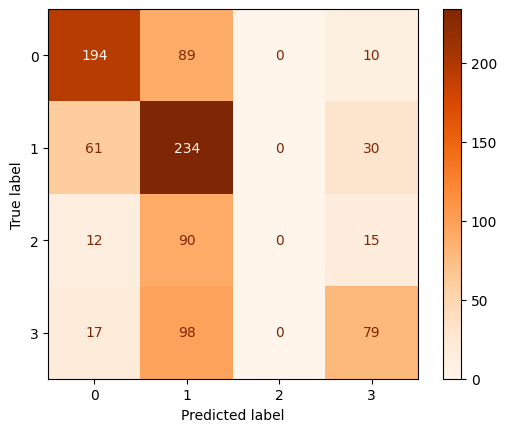

In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges');

TRAINING THE SVC CLASSIFIER

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c_val in c_values:
    # Create SVC
    svc = SVC(C=c_val, kernel='linear', random_state=42)

    # Train the model
    svc.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = svc.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average="weighted")
    recall = recall_score(y_test, predictions, average="weighted")
    f1 = f1_score(y_test, predictions, average="weighted")

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Display iteration and metrics
    print(f"C = {c_val}")
    print(f"Accuracy of the SVC model: {accuracy:.2f}")
    print(f"SVC precision: {precision:.2%}")
    print(f"SVC recall: {recall:.2%}")
    print(f"SVC F1: {f1:.2%}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C = 0.001
Accuracy of the SVC model: 0.53
SVC precision: 48.01%
SVC recall: 52.96%
SVC F1: 49.65%




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C = 0.01
Accuracy of the SVC model: 0.54
SVC precision: 48.09%
SVC recall: 54.04%
SVC F1: 50.38%




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C = 0.1
Accuracy of the SVC model: 0.54
SVC precision: 48.48%
SVC recall: 54.47%
SVC F1: 50.83%




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C = 1
Accuracy of the SVC model: 0.55
SVC precision: 48.50%
SVC recall: 54.68%
SVC F1: 51.03%




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C = 10
Accuracy of the SVC model: 0.55
SVC precision: 48.44%
SVC recall: 54.57%
SVC F1: 50.92%


C = 100
Accuracy of the SVC model: 0.55
SVC precision: 48.44%
SVC recall: 54.57%
SVC F1: 50.92%




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Best C for accuracy: ", [0.001, 0.01, 0.1, 1, 10, 100][np.argmax(accuracy_scores)])
print("Highest accuracy: ", np.max(accuracy_scores))
print("Best C for precision: ", [0.001, 0.01, 0.1, 1, 10, 100][np.argmax(precision_scores)])
print("Highest precision: ", np.max(precision_scores))
print("Best C for recall: ", [0.001, 0.01, 0.1, 1, 10, 100][np.argmax(recall_scores)])
print("Highest recall: ", np.max(recall_scores))
print("Best C for F1 score: ", [0.001, 0.01, 0.1, 1, 10, 100][np.argmax(f1_scores)])
print("Highest F1: ", np.max(f1_scores))

Best C for accuracy:  1
Highest accuracy:  0.5468245425188375
Best C for precision:  1
Highest precision:  0.4850083515537052
Best C for recall:  1
Highest recall:  0.5468245425188375
Best C for F1 score:  1
Highest F1:  0.510323333328627


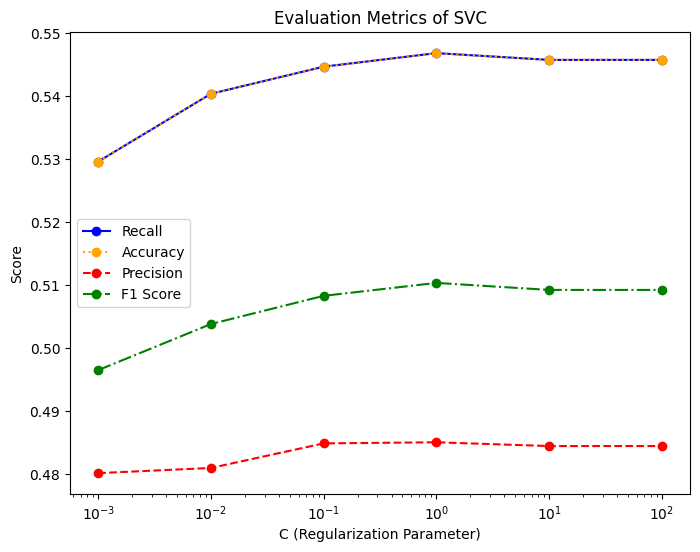

In [ ]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(8, 6))

plt.plot(c_values, recall_scores, linestyle='solid', color='blue', marker='o', label='Recall')
plt.plot(c_values, accuracy_scores, linestyle='dotted', color='orange', marker='o', label='Accuracy')
plt.plot(c_values, precision_scores, linestyle='dashed', color='red', marker='o', label='Precision')
plt.plot(c_values, f1_scores, linestyle='dashdot', color='green', marker='o', label='F1 Score')

plt.xscale('log')
plt.title('Evaluation Metrics of SVC')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.legend(loc='best')

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
              'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Train the model with the best parameters
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Make predictions
y_pred = best_svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.5446716899892358
Precision: 0.4848309858380375
Recall: 0.5446716899892358
F1 Score: 0.5082703587867473


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
